In [109]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [2]:
random_train_imgs = np.load("data/kmnist-randomized-train-imgs.npz")["arr_0"]
random_train_labels = np.load("data/kmnist-randomized-train-labels.npz")["arr_0"]
random_test_imgs = np.load("data/kmnist-randomized-test-imgs.npz")["arr_0"]
random_test_labels = np.load("data/kmnist-randomized-test-labels.npz")["arr_0"]

### Train and Valid set

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(random_train_imgs, random_train_labels, test_size=0.1, shuffle=False)

In [4]:
X_train = X_train.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255

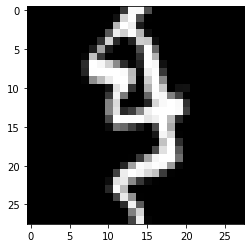

In [5]:
plt.imshow(X_train[10], cmap="gray")

In [6]:
y_train[10]

1

In [7]:
X_train.shape

(54000, 28, 28)

In [8]:
categories = len(np.unique(y_train))
categories

10

In [9]:
y_train = to_categorical(y_train, categories)
y_valid = to_categorical(y_valid, categories)

In [10]:
y_train[10]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Test set 

In [11]:
X_test = random_test_imgs
y_test = random_test_labels

In [12]:
X_test = X_test.astype("float32") / 255

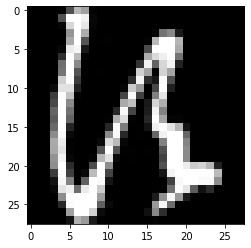

In [13]:
plt.imshow(X_test[10], cmap="gray")

In [14]:
y_test[10]

2

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
categories = len(np.unique(y_test))
categories

10

In [17]:
y_test = to_categorical(y_test, categories)
y_test[10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
X_train.shape[1:]

(28, 28)

In [ ]:
model1 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dropout(0.25),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model1.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model1.summary()

### Training

In [50]:
histories = []

In [51]:
num_units = [(10, 5), (100, 50), (1000, 500)]
for i, units in enumerate(num_units):
    print(units[0], units[1])
    optimizer = SGD(learning_rate=0.01)
    mc = ModelCheckpoint(f"sgd_best_weights_units{i+1}.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

    model = Sequential([
        Flatten(input_shape=X_train.shape[1:]),
        Dense(units[0], activation="relu"),
        Dense(units[1], activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)
    histories.append(history)

10 5
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53920/54000 [============================>.] - ETA: 0s - loss: 1.6585 - accuracy: 0.4114
Epoch 00001: val_accuracy improved from -inf to 0.60500, saving model to sgd_best_weights_units1.h5
54000/54000 [==============================] - 4s 82us/sample - loss: 1.6577 - accuracy: 0.4117 - val_loss: 1.2296 - val_accuracy: 0.6050
Epoch 2/10
53568/54000 [============================>.] - ETA: 0s - loss: 1.0149 - accuracy: 0.6806
Epoch 00002: val_accuracy improved from 0.60500 to 0.73383, saving model to sgd_best_weights_units1.h5
54000/54000 [==============================] - 4s 71us/sample - loss: 1.0137 - accuracy: 0.6812 - val_loss: 0.8621 - val_accuracy: 0.7338
Epoch 3/10
53216/54000 [============================>.] - ETA: 0s - loss: 0.7639 - accuracy: 0.7644
Epoch 00003: val_accuracy improved from 0.73383 to 0.77350, saving model to sgd_best_weights_units1.h5
54000/54000 [==============================] - 4s 69us/sample - 

Epoch 5/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.2374 - accuracy: 0.9323
Epoch 00005: val_accuracy improved from 0.91067 to 0.92150, saving model to sgd_best_weights_units3.h5
54000/54000 [==============================] - 14s 265us/sample - loss: 0.2374 - accuracy: 0.9323 - val_loss: 0.2771 - val_accuracy: 0.9215
Epoch 6/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.9427
Epoch 00006: val_accuracy improved from 0.92150 to 0.92933, saving model to sgd_best_weights_units3.h5
54000/54000 [==============================] - 15s 275us/sample - loss: 0.2054 - accuracy: 0.9428 - val_loss: 0.2514 - val_accuracy: 0.9293
Epoch 7/10
53792/54000 [============================>.] - ETA: 0s - loss: 0.1792 - accuracy: 0.9505
Epoch 00007: val_accuracy improved from 0.92933 to 0.93383, saving model to sgd_best_weights_units3.h5
54000/54000 [==============================] - 15s 270us/sample - loss: 0.1792 - accuracy: 0.9505 - val_loss: 0

In [53]:
histories[0].history['val_accuracy']

[0.605,
 0.7338333,
 0.7735,
 0.7991667,
 0.81166667,
 0.8171667,
 0.81983334,
 0.824,
 0.82316667,
 0.824]

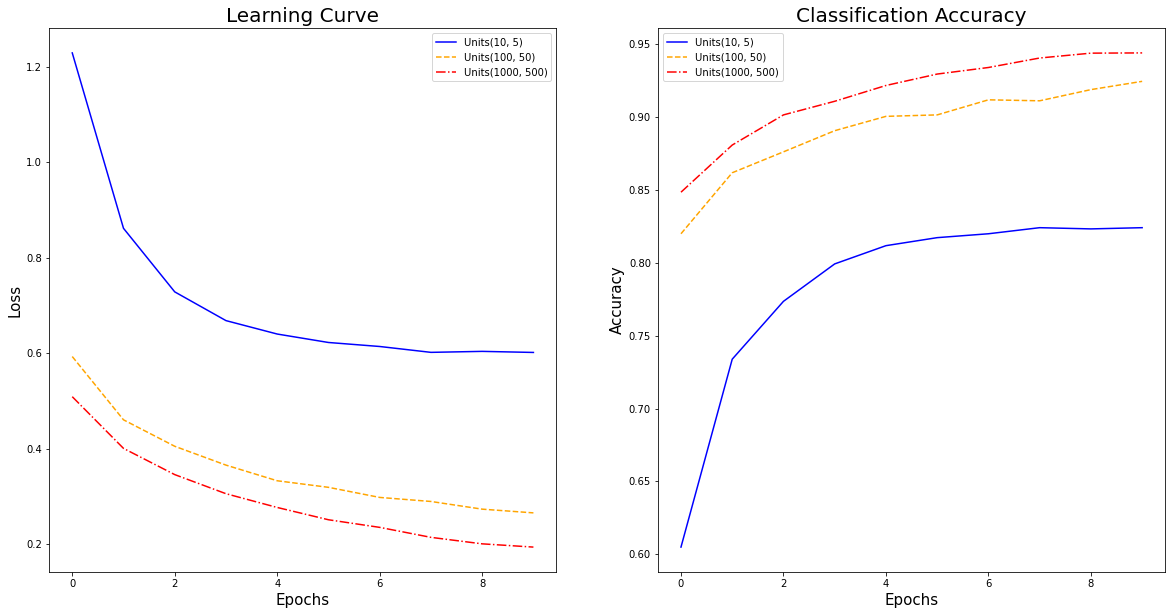

In [59]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(histories[0].history['val_loss'], color='blue', label='Units(10, 5)', ls="-")
plt.plot(histories[1].history['val_loss'], color='orange', label='Units(100, 50)', ls="--")
plt.plot(histories[2].history['val_loss'], color='red', label='Units(1000, 500)', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(histories[0].history['val_accuracy'], color='blue', label='Units(10, 5)', ls="-")
plt.plot(histories[1].history['val_accuracy'], color='orange', label='Units(100, 50)', ls="--")
plt.plot(histories[2].history['val_accuracy'], color='red', label='Units(1000, 500)', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [129]:
for i in range(len(histories)):
    print(histories[i].model.evaluate(X_test, y_test, verbose=0))
    

[1.1111296659469605, 0.6763]
[0.5665497626304626, 0.8282]
[0.4107166006088257, 0.8786]


In [130]:
for i in range(len(histories)):
    model = load_model(f"sgd_best_weights_units{i+1}.h5")
    print(model.evaluate(X_test, y_test, verbose=0))

[1.1408894746780396, 0.6672]
[0.5665497626304626, 0.8282]
[0.4107166006088257, 0.8786]


In [61]:
histories2 = []

In [62]:
num_units = [(1000, 500), [2000, 500], [1000, 1000], [2000, 1000]]
for i, units in enumerate(num_units):
    print(units[0], units[1])
    optimizer = SGD(learning_rate=0.01)
    mc = ModelCheckpoint(f"sgd_best_weights_units{i+1}_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

    model = Sequential([
        Flatten(input_shape=X_train.shape[1:]),
        Dense(units[0], activation="relu"),
        Dense(units[1], activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)
    histories2.append(history)

1000 500
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.7737 - accuracy: 0.7842
Epoch 00001: val_accuracy improved from -inf to 0.84850, saving model to sgd_best_weights_units1_big.h5
54000/54000 [==============================] - 17s 310us/sample - loss: 0.7737 - accuracy: 0.7843 - val_loss: 0.5156 - val_accuracy: 0.8485
Epoch 2/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.4244 - accuracy: 0.8750
Epoch 00002: val_accuracy improved from 0.84850 to 0.88200, saving model to sgd_best_weights_units1_big.h5
54000/54000 [==============================] - 15s 284us/sample - loss: 0.4244 - accuracy: 0.8750 - val_loss: 0.4053 - val_accuracy: 0.8820
Epoch 3/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.9027
Epoch 00003: val_accuracy improved from 0.88200 to 0.90000, saving model to sgd_best_weights_units1_big.h5
54000/54000 [==============================]

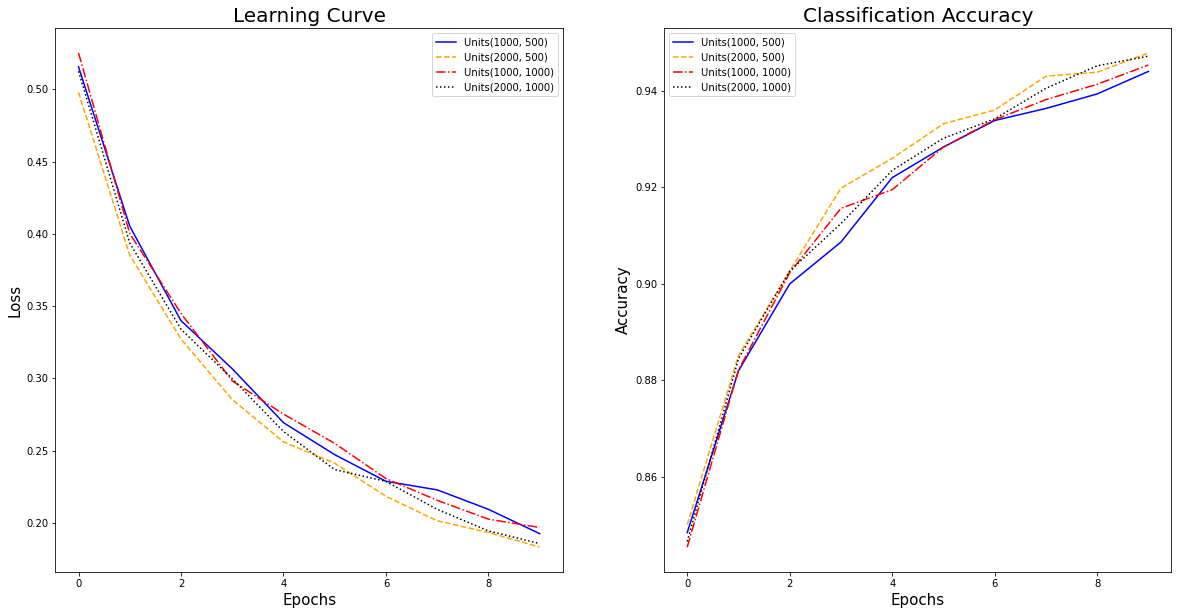

In [65]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(histories2[0].history['val_loss'], color='blue', label='Units(1000, 500)', ls="-")
plt.plot(histories2[1].history['val_loss'], color='orange', label='Units(2000, 500)', ls="--")
plt.plot(histories2[2].history['val_loss'], color='red', label='Units(1000, 1000)', ls="-.")
plt.plot(histories2[3].history['val_loss'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(histories2[0].history['val_accuracy'], color='blue', label='Units(1000, 500)', ls="-")
plt.plot(histories2[1].history['val_accuracy'], color='orange', label='Units(2000, 500)', ls="--")
plt.plot(histories2[2].history['val_accuracy'], color='red', label='Units(1000, 1000)', ls="-.")
plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

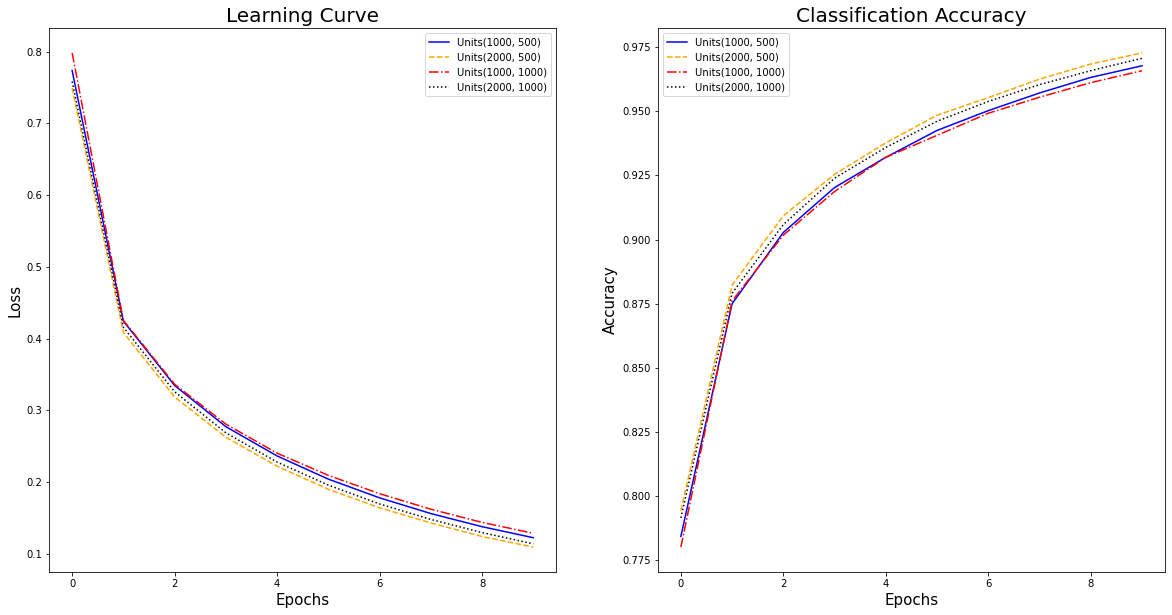

In [134]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(histories2[0].history['loss'], color='blue', label='Units(1000, 500)', ls="-")
plt.plot(histories2[1].history['loss'], color='orange', label='Units(2000, 500)', ls="--")
plt.plot(histories2[2].history['loss'], color='red', label='Units(1000, 1000)', ls="-.")
plt.plot(histories2[3].history['loss'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(histories2[0].history['accuracy'], color='blue', label='Units(1000, 500)', ls="-")
plt.plot(histories2[1].history['accuracy'], color='orange', label='Units(2000, 500)', ls="--")
plt.plot(histories2[2].history['accuracy'], color='red', label='Units(1000, 1000)', ls="-.")
plt.plot(histories2[3].history['accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [67]:
for i in range(len(num_units)):
    model = load_model(f"sgd_best_weights_units{i+1}_big.h5")
    print(model.evaluate(X_test, y_test, verbose=0))

[0.4185641461133957, 0.8737]
[0.39569865999221804, 0.8818]
[0.432246098947525, 0.8719]
[0.400100967001915, 0.8805]


In [68]:
for i in range(3):
    model = load_model(f"sgd_best_weights_units{i+1}.h5")
    print(model.evaluate(X_test, y_test, verbose=0))

[1.1408894746780396, 0.6672]
[0.5665497626304626, 0.8282]
[0.4107166006088257, 0.8786]


In [78]:
histories2[3].model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 2000)              1570000   
_________________________________________________________________
dense_44 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_45 (Dense)             (None, 10)                10010     
Total params: 3,581,010
Trainable params: 3,581,010
Non-trainable params: 0
_________________________________________________________________


### Different Layers

In [80]:
ly_histories = []

In [84]:
# optimizer = SGD(learning_rate=0.01)
# mc = ModelCheckpoint(f"sgd_best_weights_ly2.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

# model = Sequential([
#     Flatten(input_shape=X_train.shape[1:]),
#     Dense(100, activation="relu"),
#     Dense(50, activation="relu"),
#     Dense(10, activation="softmax")
# ])
# model.compile(loss="categorical_crossentropy",
#               optimizer=optimizer,
#               metrics=["accuracy"])

# history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# ly_histories.append(history)

# ##
# mc = ModelCheckpoint(f"sgd_best_weights_ly3.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

# model = Sequential([
#     Flatten(input_shape=X_train.shape[1:]),
#     Dense(100, activation="relu"),
#     Dense(50, activation="relu"),
#     Dense(50, activation="relu"),
#     Dense(10, activation="softmax")
# ])
# model.compile(loss="categorical_crossentropy",
#               optimizer=optimizer,
#               metrics=["accuracy"])

# history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# ly_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_ly4.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(50, activation="relu"),
    Dense(25, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# ly_histories.append(history)

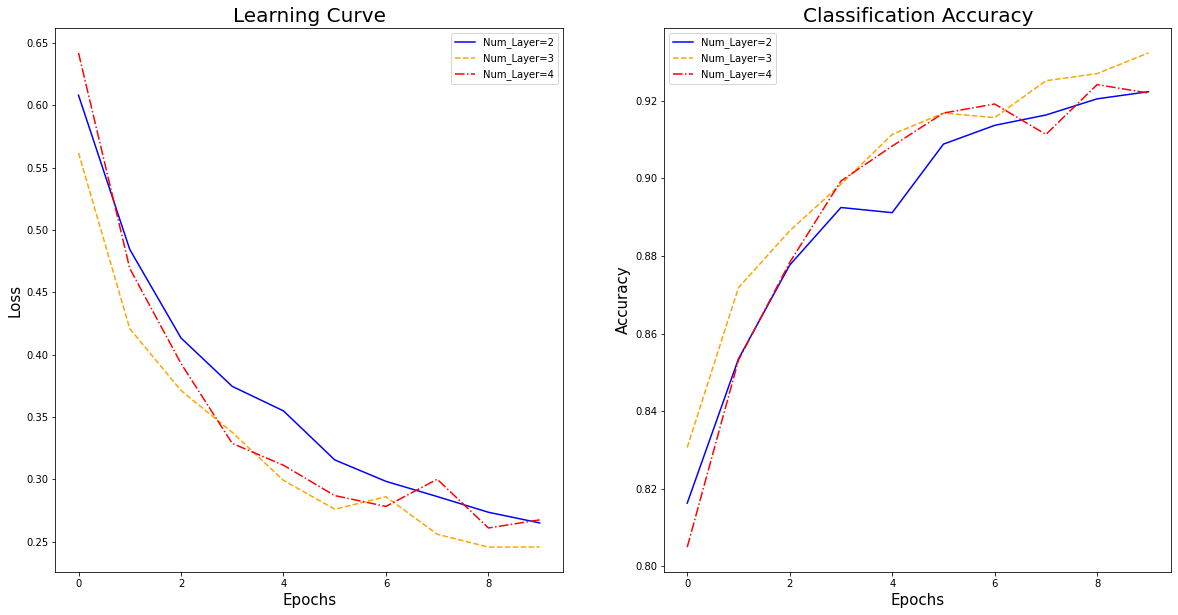

In [85]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(ly_histories[0].history['val_loss'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories[1].history['val_loss'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(history.history['val_loss'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_loss'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories[0].history['val_accuracy'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories[1].history['val_accuracy'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(history.history['val_accuracy'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [120]:
model = load_model("sgd_best_weights_ly2.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model("sgd_best_weights_ly3.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model("sgd_best_weights_ly4.h5")
print(model.evaluate(X_test, y_test, verbose=0))

[0.5353379221916199, 0.8392]
[0.5266384969234467, 0.8438]
[0.5244261534690857, 0.8512]


In [86]:
ly_histories2 = []

In [87]:
optimizer = SGD(learning_rate=0.01)
mc = ModelCheckpoint(f"sgd_best_weights_ly2_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
ly_histories2.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_ly3_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
ly_histories2.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_ly4_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
ly_histories2.append(history)

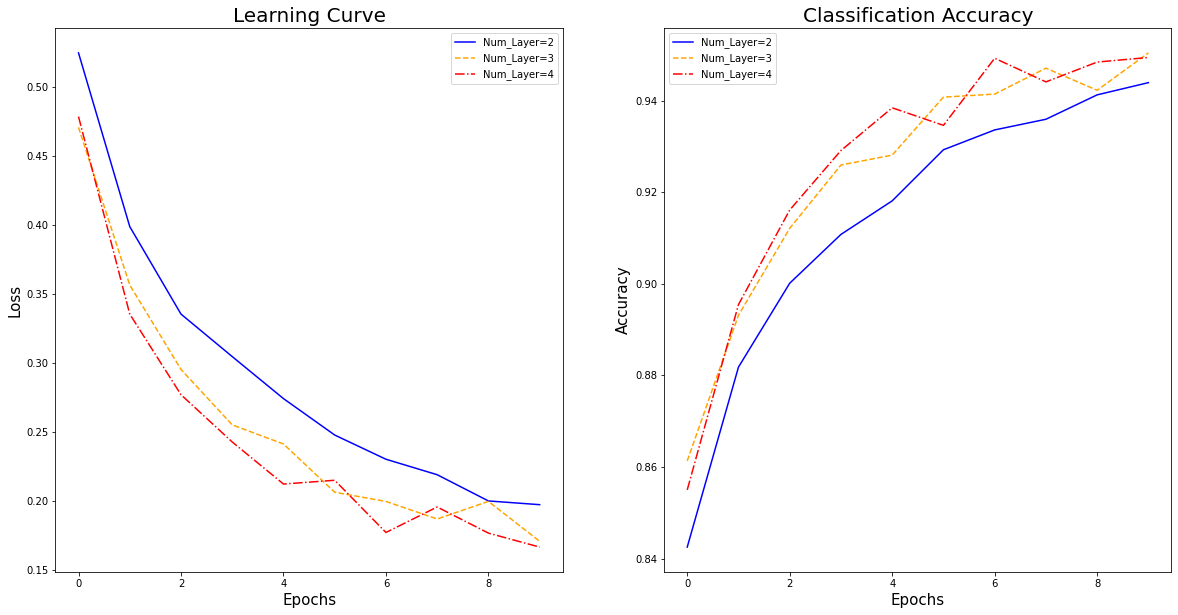

In [88]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['val_loss'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['val_loss'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['val_loss'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_loss'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['val_accuracy'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['val_accuracy'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['val_accuracy'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [89]:
for i in range(3):
    model = load_model(f"sgd_best_weights_ly{i+2}_big.h5")
    print(model.evaluate(X_test, y_test, verbose=0))

[0.421741497862339, 0.8793]
[0.39278566045165064, 0.8882]
[0.41052679052948954, 0.8897]


In [136]:
print(ly_histories2[0].history['accuracy'][-1])
print(ly_histories2[1].history['accuracy'][-1])
print(ly_histories2[2].history['accuracy'][-1])
print(ly_histories2[0].history['val_accuracy'][-1])
print(ly_histories2[1].history['val_accuracy'][-1])
print(ly_histories2[2].history['val_accuracy'][-1])

0.9676296
0.982037
0.9903333
0.944
0.9505
0.9495


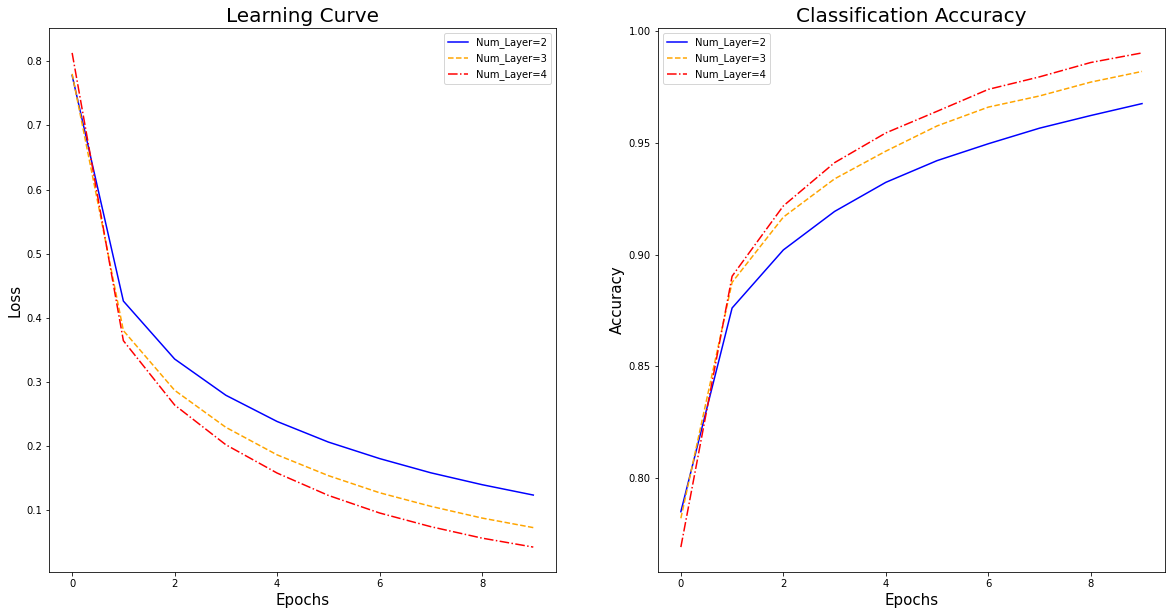

In [131]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['loss'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['loss'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['loss'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_loss'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['accuracy'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['accuracy'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['accuracy'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

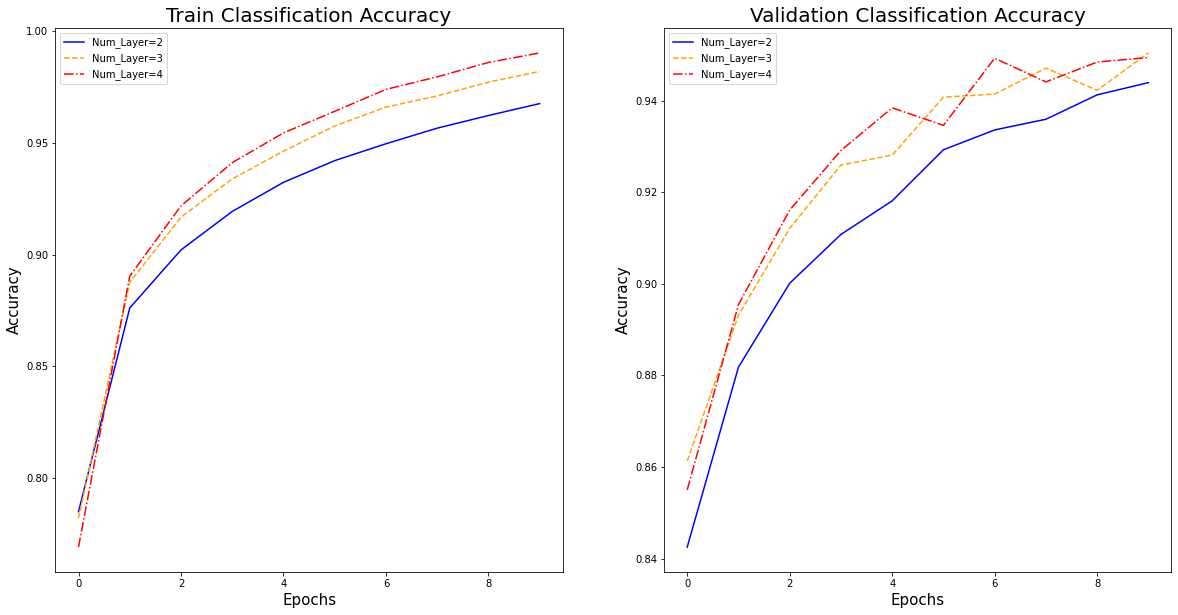

In [139]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Train Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['accuracy'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['accuracy'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['accuracy'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Validation Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories2[0].history['val_accuracy'], color='blue', label='Num_Layer=2', ls="-")
plt.plot(ly_histories2[1].history['val_accuracy'], color='orange', label='Num_Layer=3', ls="--")
plt.plot(ly_histories2[2].history['val_accuracy'], color='red', label='Num_Layer=4', ls="-.")
# plt.plot(histories2[3].history['val_accuracy'], color='black', label='Units(2000, 1000)', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

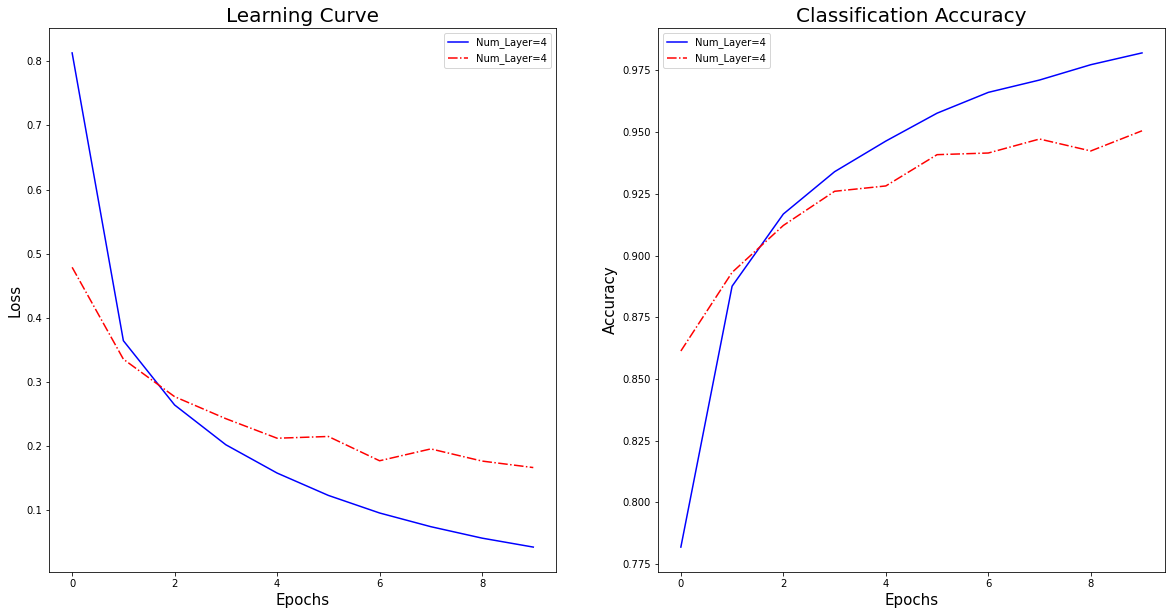

In [143]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(ly_histories2[2].history['loss'], color='blue', label='Num_Layer=4', ls="-")
plt.plot(ly_histories2[2].history['val_loss'], color='red', label='Num_Layer=4', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(ly_histories2[1].history['accuracy'], color='blue', label='Num_Layer=4', ls="-")
plt.plot(ly_histories2[1].history['val_accuracy'], color='red', label='Num_Layer=4', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

### Different learning rate

In [19]:
mc = ModelCheckpoint("best_weights.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

In [ ]:
histories1 = model1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

In [23]:
optimizer = SGD(learning_rate=0.1)

In [24]:
model1 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])
model1.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [25]:
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.8534
Epoch 00001: val_accuracy improved from -inf to 0.89833, saving model to best_weights.h5
54000/54000 [==============================] - 7s 125us/sample - loss: 0.4734 - accuracy: 0.8534 - val_loss: 0.3270 - val_accuracy: 0.8983
Epoch 2/10
53632/54000 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9309
Epoch 00002: val_accuracy improved from 0.89833 to 0.92517, saving model to best_weights.h5
54000/54000 [==============================] - 5s 97us/sample - loss: 0.2264 - accuracy: 0.9309 - val_loss: 0.2502 - val_accuracy: 0.9252
Epoch 3/10
53472/54000 [============================>.] - ETA: 0s - loss: 0.1624 - accuracy: 0.9503
Epoch 00003: val_accuracy improved from 0.92517 to 0.93700, saving model to best_weights.h5
54000/54000 [==============================] - 5s 99us/sample - loss: 0.1624 - accuracy: 0.9503 - val

In [27]:
model1 = load_model("best_weights.h5")
model1.evaluate(X_test, y_test, verbose=0)

[0.46473107290267945, 0.885]

In [28]:
optimizer = SGD(learning_rate=0.01)
mc = ModelCheckpoint("sgd_best_weights2.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

model2 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])
model2.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53696/54000 [============================>.] - ETA: 0s - loss: 0.9733 - accuracy: 0.7096
Epoch 00001: val_accuracy improved from -inf to 0.81767, saving model to sgd_best_weights2.h5
54000/54000 [==============================] - 7s 121us/sample - loss: 0.9712 - accuracy: 0.7102 - val_loss: 0.6090 - val_accuracy: 0.8177
Epoch 2/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.5102 - accuracy: 0.8460
Epoch 00002: val_accuracy improved from 0.81767 to 0.85217, saving model to sgd_best_weights2.h5
54000/54000 [==============================] - 5s 101us/sample - loss: 0.5101 - accuracy: 0.8460 - val_loss: 0.4845 - val_accuracy: 0.8522
Epoch 3/10
53824/54000 [============================>.] - ETA: 0s - loss: 0.4165 - accuracy: 0.8749
Epoch 00003: val_accuracy improved from 0.85217 to 0.87333, saving model to sgd_best_weights2.h5
54000/54000 [==============================] - 6s 103us/sample - loss: 0.4159 - accur

In [29]:
model2 = load_model("sgd_best_weights2.h5")
model2.evaluate(X_test, y_test, verbose=0)

[0.5341165228366852, 0.8399]

In [30]:
optimizer = SGD(learning_rate=0.01)
mc = ModelCheckpoint("sgd_best_weights3.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

model3 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])
model3.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history3 = model3.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.7789 - accuracy: 0.7835
Epoch 00001: val_accuracy improved from -inf to 0.84800, saving model to sgd_best_weights3.h5
54000/54000 [==============================] - 16s 295us/sample - loss: 0.7784 - accuracy: 0.7836 - val_loss: 0.5112 - val_accuracy: 0.8480
Epoch 2/10
53920/54000 [============================>.] - ETA: 0s - loss: 0.4210 - accuracy: 0.8785
Epoch 00002: val_accuracy improved from 0.84800 to 0.88100, saving model to sgd_best_weights3.h5
54000/54000 [==============================] - 15s 284us/sample - loss: 0.4208 - accuracy: 0.8785 - val_loss: 0.4025 - val_accuracy: 0.8810
Epoch 3/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.3320 - accuracy: 0.9041
Epoch 00003: val_accuracy improved from 0.88100 to 0.89783, saving model to sgd_best_weights3.h5
54000/54000 [==============================] - 14s 268us/sample - loss: 0.3319 - ac

In [32]:
model3 = load_model("sgd_best_weights3.h5")
model3.evaluate(X_test, y_test, verbose=0)

[0.41704785594940186, 0.8719]

In [34]:
optimizer = SGD(learning_rate=0.1)
mc = ModelCheckpoint("sgd_best_weights4.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

model4 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])
model4.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history4 = model4.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53856/54000 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8826
Epoch 00001: val_accuracy improved from -inf to 0.93183, saving model to sgd_best_weights4.h5
54000/54000 [==============================] - 17s 311us/sample - loss: 0.3845 - accuracy: 0.8827 - val_loss: 0.2298 - val_accuracy: 0.9318
Epoch 2/10
53888/54000 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9555
Epoch 00002: val_accuracy improved from 0.93183 to 0.95250, saving model to sgd_best_weights4.h5
54000/54000 [==============================] - 15s 276us/sample - loss: 0.1497 - accuracy: 0.9556 - val_loss: 0.1595 - val_accuracy: 0.9525
Epoch 3/10
53824/54000 [============================>.] - ETA: 0s - loss: 0.0866 - accuracy: 0.9748
Epoch 00003: val_accuracy improved from 0.95250 to 0.95817, saving model to sgd_best_weights4.h5
54000/54000 [==============================] - 15s 280us/sample - loss: 0.0865 - ac

In [36]:
model4 = load_model("sgd_best_weights4.h5")
model4.evaluate(X_test, y_test, verbose=0)

[0.37958197362106294, 0.9184]

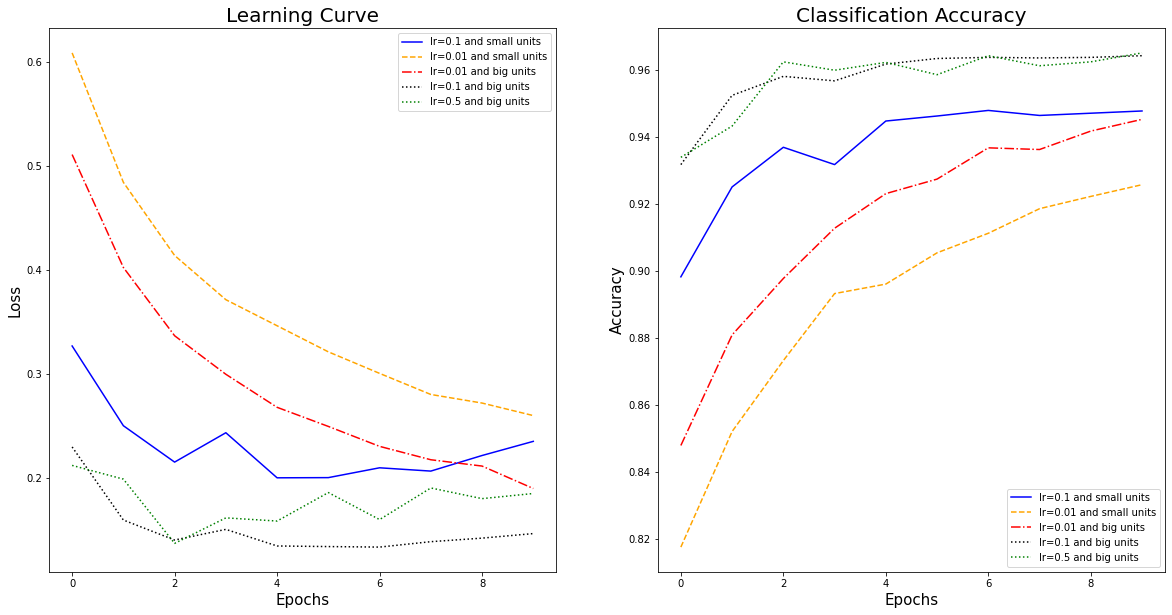

In [95]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(history1.history['val_loss'], color='blue', label='lr=0.1 and small units', ls="-")
plt.plot(history2.history['val_loss'], color='orange', label='lr=0.01 and small units', ls="--")
plt.plot(history3.history['val_loss'], color='red', label='lr=0.01 and big units', ls="-.")
plt.plot(history4.history['val_loss'], color='black', label='lr=0.1 and big units', ls=":")
plt.plot(history5.history['val_loss'], color='green', label='lr=0.5 and big units', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(history1.history['val_accuracy'], color='blue', label='lr=0.1 and small units', ls="-")
plt.plot(history2.history['val_accuracy'], color='orange', label='lr=0.01 and small units', ls="--")
plt.plot(history3.history['val_accuracy'], color='red', label='lr=0.01 and big units', ls="-.")
plt.plot(history4.history['val_accuracy'], color='black', label='lr=0.1 and big units', ls=":")
plt.plot(history5.history['val_accuracy'], color='green', label='lr=0.5 and big units', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

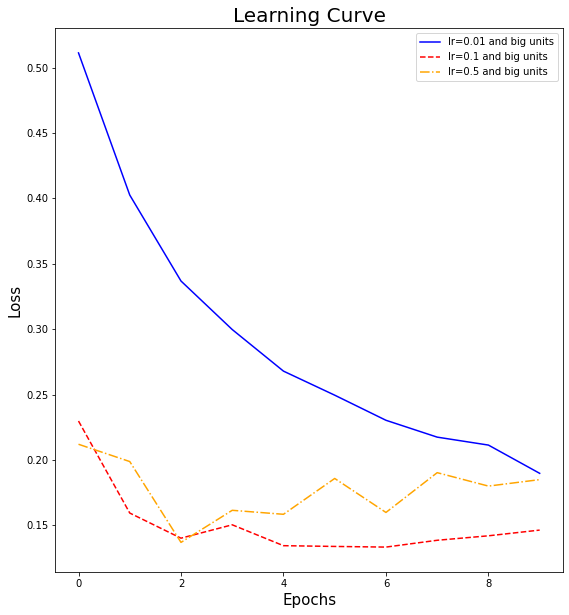

In [149]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
# plt.plot(history1.history['val_loss'], color='blue', label='lr=0.1 and small units', ls="-")
# plt.plot(history2.history['val_loss'], color='orange', label='lr=0.01 and small units', ls="--")
plt.plot(history3.history['val_loss'], color='blue', label='lr=0.01 and big units', ls="-")
plt.plot(history4.history['val_loss'], color='red', label='lr=0.1 and big units', ls="--")
plt.plot(history5.history['val_loss'], color='orange', label='lr=0.5 and big units', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

# plt.subplot(1, 2, 2)
# plt.title('Classification Accuracy', fontdict={"fontsize":20})
# # plt.plot(history1.history['val_accuracy'], color='blue', label='lr=0.1 and small units', ls="-")
# # plt.plot(history2.history['val_accuracy'], color='orange', label='lr=0.01 and small units', ls="--")
# plt.plot(history3.history['val_accuracy'], color='blue', label='lr=0.01 and big units', ls="-")
# plt.plot(history4.history['val_accuracy'], color='red', label='lr=0.1 and big units', ls="--")
# plt.plot(history5.history['val_accuracy'], color='orange', label='lr=0.5 and big units', ls="-.")
# plt.xlabel("Epochs", fontdict={"fontsize":15})
# plt.ylabel("Accuracy", fontdict={"fontsize":15})
# plt.legend()
plt.show()

In [92]:
optimizer = SGD(learning_rate=0.5)
mc = ModelCheckpoint("sgd_best_weights5.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

model5 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])
model5.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history5 = model5.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
53984/54000 [============================>.] - ETA: 0s - loss: 0.3469 - accuracy: 0.8924
Epoch 00001: val_accuracy improved from -inf to 0.93400, saving model to sgd_best_weights5.h5
54000/54000 [==============================] - 18s 335us/sample - loss: 0.3469 - accuracy: 0.8924 - val_loss: 0.2120 - val_accuracy: 0.9340
Epoch 2/10
53856/54000 [============================>.] - ETA: 0s - loss: 0.1341 - accuracy: 0.9578
Epoch 00002: val_accuracy improved from 0.93400 to 0.94333, saving model to sgd_best_weights5.h5
54000/54000 [==============================] - 15s 283us/sample - loss: 0.1341 - accuracy: 0.9579 - val_loss: 0.1988 - val_accuracy: 0.9433
Epoch 3/10
53952/54000 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9748
Epoch 00003: val_accuracy improved from 0.94333 to 0.96250, saving model to sgd_best_weights5.h5
54000/54000 [==============================] - 15s 285us/sample - loss: 0.0806 - ac

In [93]:
model5 = load_model("sgd_best_weights5.h5")
model5.evaluate(X_test, y_test, verbose=0)

[0.5067387534912675, 0.9128]

In [147]:
print(history3.history["accuracy"][-1])
print(history3.history["val_accuracy"][-1])
print(history4.history["accuracy"][-1])
print(history4.history["val_accuracy"][-1])
print(history5.history["accuracy"][-1])
print(history5.history["val_accuracy"][-1])

0.96757406
0.94533336
1.0
0.96433336
0.9968704
0.9651667


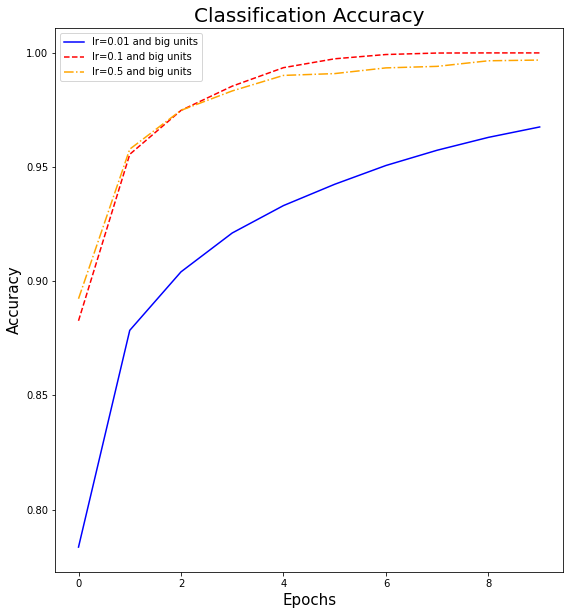

In [150]:
plt.figure(figsize=(20, 10))
# plt.subplot(1, 2, 1)
# plt.title('Learning Curve', fontdict={"fontsize":20})
# # plt.plot(history1.history['val_loss'], color='blue', label='lr=0.1 and small units', ls="-")
# # plt.plot(history2.history['val_loss'], color='orange', label='lr=0.01 and small units', ls="--")
# plt.plot(history3.history['val_loss'], color='blue', label='lr=0.01 and big units', ls="-")
# plt.plot(history4.history['val_loss'], color='red', label='lr=0.1 and big units', ls="--")
# plt.plot(history5.history['val_loss'], color='orange', label='lr=0.5 and big units', ls="-.")
# plt.xlabel("Epochs", fontdict={"fontsize":15})
# plt.ylabel("Loss", fontdict={"fontsize":15})
# plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
# plt.plot(history1.history['val_accuracy'], color='blue', label='lr=0.1 and small units', ls="-")
# plt.plot(history2.history['val_accuracy'], color='orange', label='lr=0.01 and small units', ls="--")
plt.plot(history3.history['accuracy'], color='blue', label='lr=0.01 and big units', ls="-")
plt.plot(history4.history['accuracy'], color='red', label='lr=0.1 and big units', ls="--")
plt.plot(history5.history['accuracy'], color='orange', label='lr=0.5 and big units', ls="-.")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

### Dropout

In [96]:
do_histories = []

In [98]:
optimizer = SGD(learning_rate=0.1)
mc = ModelCheckpoint(f"sgd_best_weights_do_0_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
do_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_do_1_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
do_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_do_2_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
do_histories.append(history)

In [102]:
mc = ModelCheckpoint(f"sgd_best_weights_do_3_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
do_histories.append(history)

mc = ModelCheckpoint(f"sgd_best_weights_do_4_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dropout(0.25),
    Dense(250, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
do_histories.append(history)

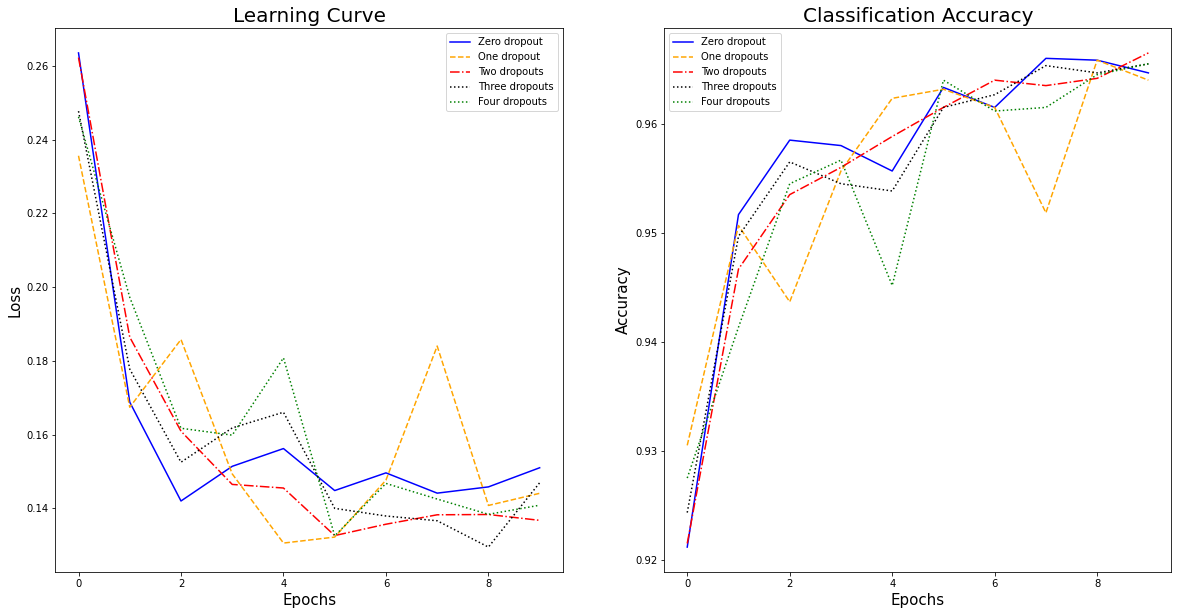

In [103]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['val_loss'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['val_loss'], color='orange', label='One dropout', ls="--")
plt.plot(do_histories[2].history['val_loss'], color='red', label='Two dropouts', ls="-.")
plt.plot(do_histories[3].history['val_loss'], color='black', label='Three dropouts', ls=":")
plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['val_accuracy'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['val_accuracy'], color='orange', label='One dropouts', ls="--")
plt.plot(do_histories[2].history['val_accuracy'], color='red', label='Two dropouts', ls="-.")
plt.plot(do_histories[3].history['val_accuracy'], color='black', label='Three dropouts', ls=":")
plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [104]:
model = load_model(f"sgd_best_weights_do_x_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_do_1_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_do_2_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_do_3_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_do_4_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))

[0.37103642443493007, 0.9178]
[0.342460842089355, 0.9203]
[0.35827160963118077, 0.9137]
[0.35976080292612317, 0.9206]
[0.3502523343406618, 0.9152]


In [155]:
print(do_histories[0].history['accuracy'][-1])
print(do_histories[1].history['accuracy'][-1])
print(do_histories[2].history['accuracy'][-1])

1.0
0.9954444
0.98874074
0.96466666
0.964
0.9665


In [106]:
print(do_histories[0].history['accuracy'])
print(do_histories[1].history['accuracy'])
print(do_histories[2].history['accuracy'])
# print(do_histories[0].history['accuracy'])
# print(do_histories[0].history['accuracy'])

[0.8812963, 0.95496297, 0.9746852, 0.986037, 0.9925, 0.9972037, 0.9990741, 0.9997778, 1.0, 1.0]
[0.8721296, 0.9448519, 0.9636852, 0.97392595, 0.98168516, 0.98716664, 0.9890556, 0.9913704, 0.99303705, 0.9954444]
[0.85264814, 0.93225926, 0.95148146, 0.9628889, 0.9707222, 0.9780741, 0.9815, 0.9841296, 0.9866296, 0.98874074]


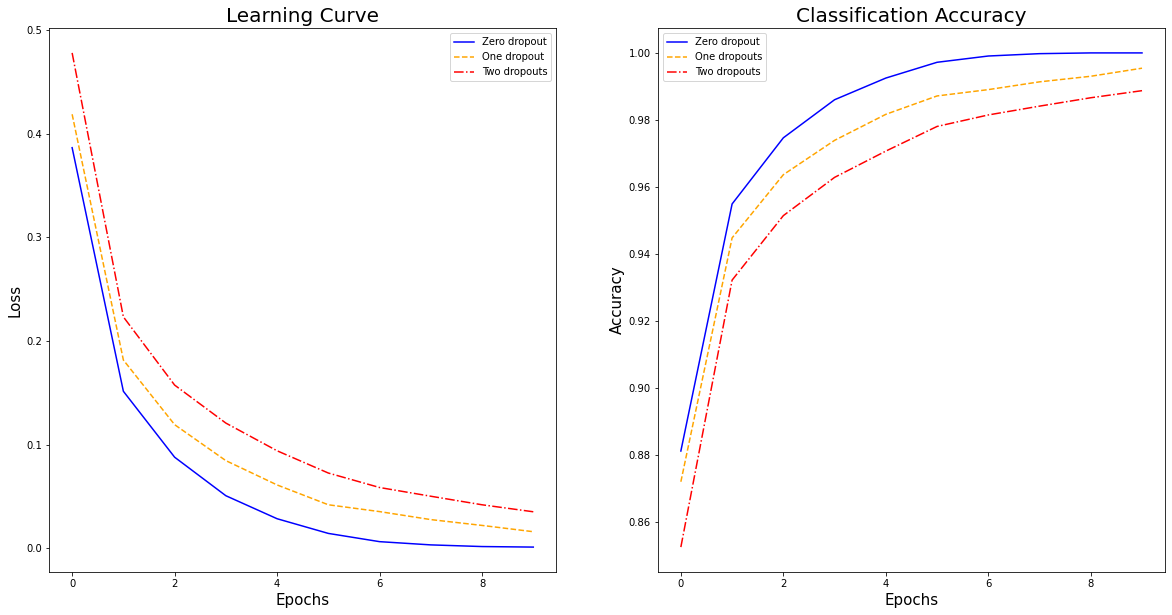

In [108]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['loss'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['loss'], color='orange', label='One dropout', ls="--")
plt.plot(do_histories[2].history['loss'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_loss'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['accuracy'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['accuracy'], color='orange', label='One dropouts', ls="--")
plt.plot(do_histories[2].history['accuracy'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_accuracy'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

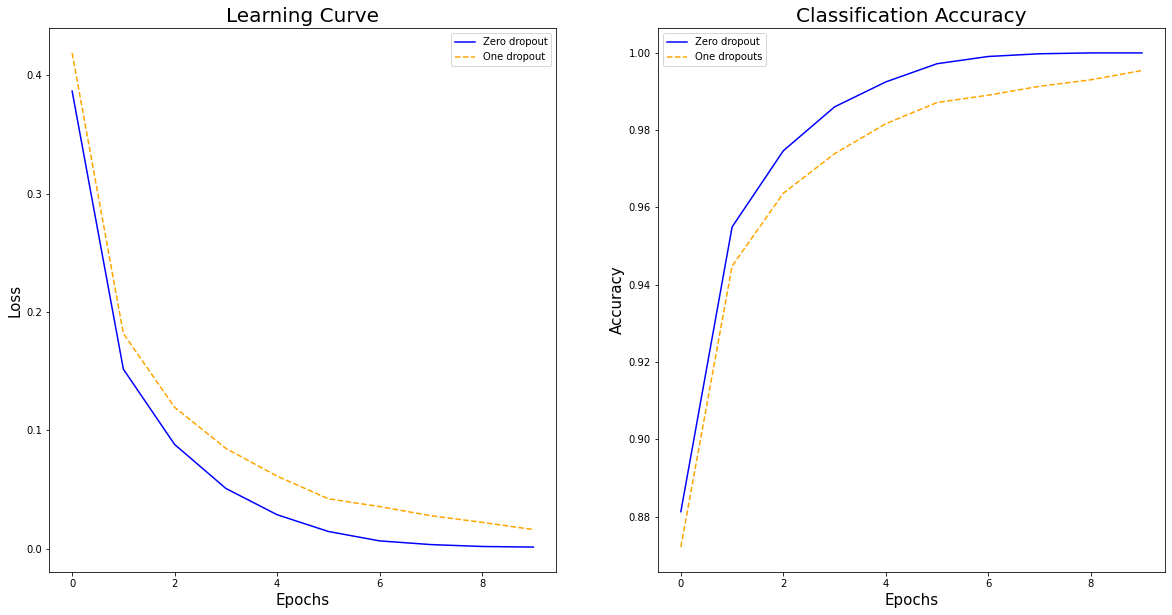

In [151]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['loss'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['loss'], color='orange', label='One dropout', ls="--")
# plt.plot(do_histories[2].history['loss'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_loss'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['accuracy'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['accuracy'], color='orange', label='One dropouts', ls="--")
# plt.plot(do_histories[2].history['accuracy'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_accuracy'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

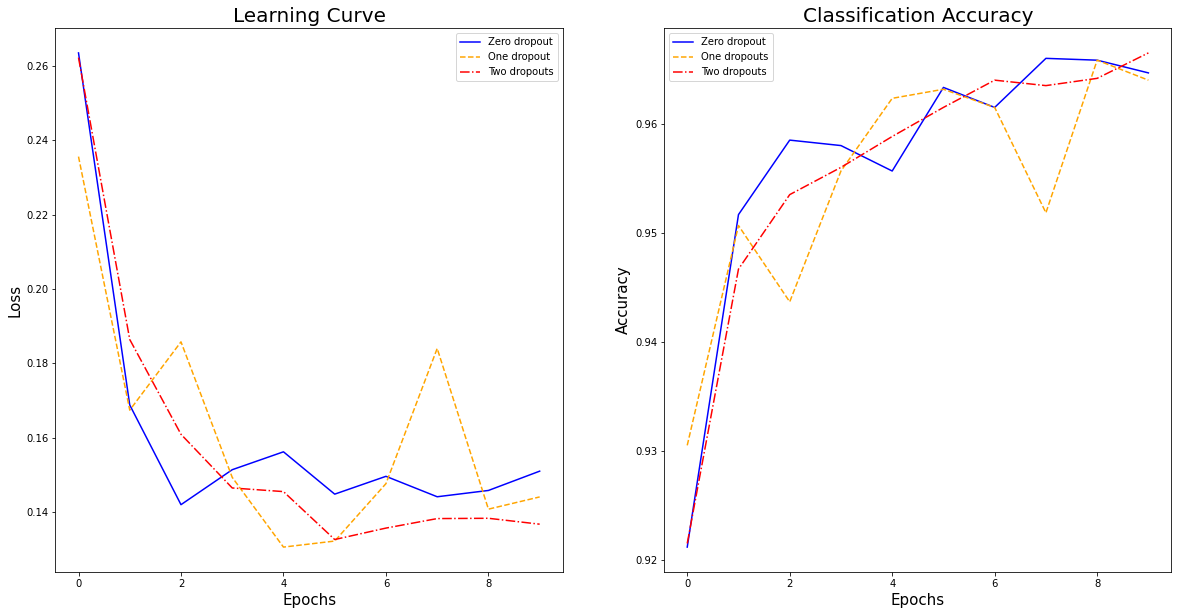

In [153]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['val_loss'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['val_loss'], color='orange', label='One dropout', ls="--")
plt.plot(do_histories[2].history['val_loss'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_loss'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(do_histories[0].history['val_accuracy'], color='blue', label='Zero dropout', ls="-")
plt.plot(do_histories[1].history['val_accuracy'], color='orange', label='One dropouts', ls="--")
plt.plot(do_histories[2].history['val_accuracy'], color='red', label='Two dropouts', ls="-.")
# plt.plot(do_histories[3].history['val_accuracy'], color='black', label='Three dropouts', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

### Batch normalization

In [112]:
bn_histories = []

In [113]:
optimizer = SGD(learning_rate=0.1)
mc = ModelCheckpoint(f"sgd_best_weights_bn_0_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
bn_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_bn_1_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
#     Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
bn_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_bn_2_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
#     Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
bn_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_bn_3_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
#     Dropout(0.25),
    BatchNormalization(),
    Dense(500, activation="relu"),
#     Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
bn_histories.append(history)

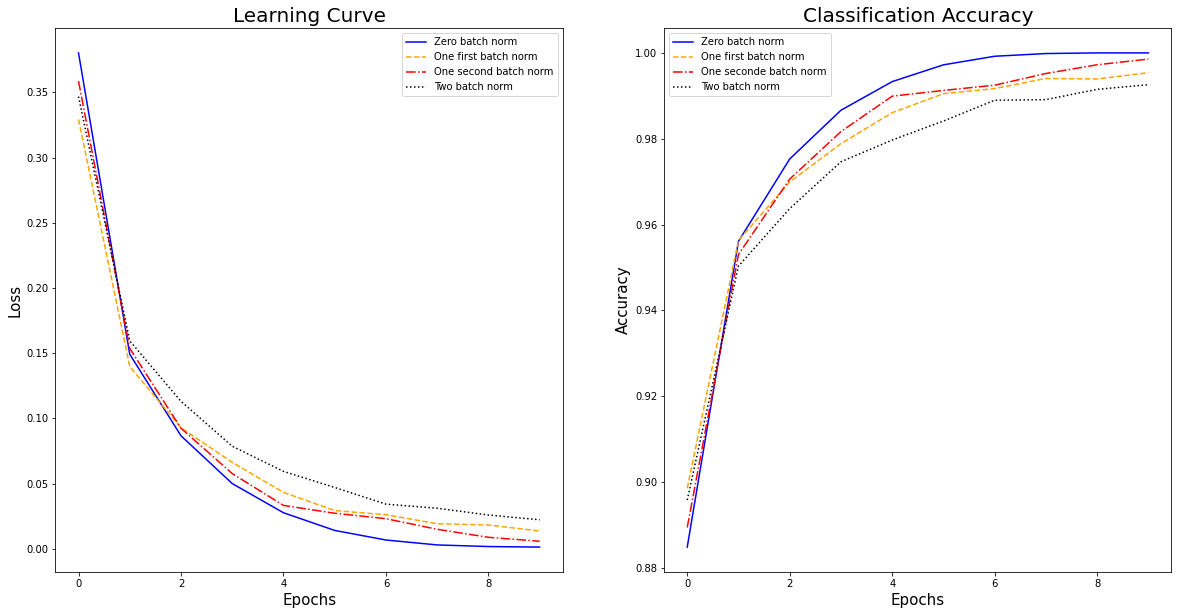

In [119]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(bn_histories[0].history['loss'], color='blue', label='Zero batch norm', ls="-")
plt.plot(bn_histories[1].history['loss'], color='orange', label='One first batch norm', ls="--")
plt.plot(bn_histories[2].history['loss'], color='red', label='One second batch norm', ls="-.")
plt.plot(bn_histories[3].history['loss'], color='black', label='Two batch norm', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(bn_histories[0].history['accuracy'], color='blue', label='Zero batch norm', ls="-")
plt.plot(bn_histories[1].history['accuracy'], color='orange', label='One first batch norm', ls="--")
plt.plot(bn_histories[2].history['accuracy'], color='red', label='One seconde batch norm', ls="-.")
plt.plot(bn_histories[3].history['accuracy'], color='black', label='Two batch norm', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [117]:
model = load_model(f"sgd_best_weights_bn_0_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_bn_1_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_bn_2_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))
model = load_model(f"sgd_best_weights_bn_3_big.h5")
print(model.evaluate(X_test, y_test, verbose=0))

[0.3852898848278448, 0.9153]
[0.39089740934958683, 0.9223]
[0.3876385444305837, 0.9219]
[0.3954175749512389, 0.9216]


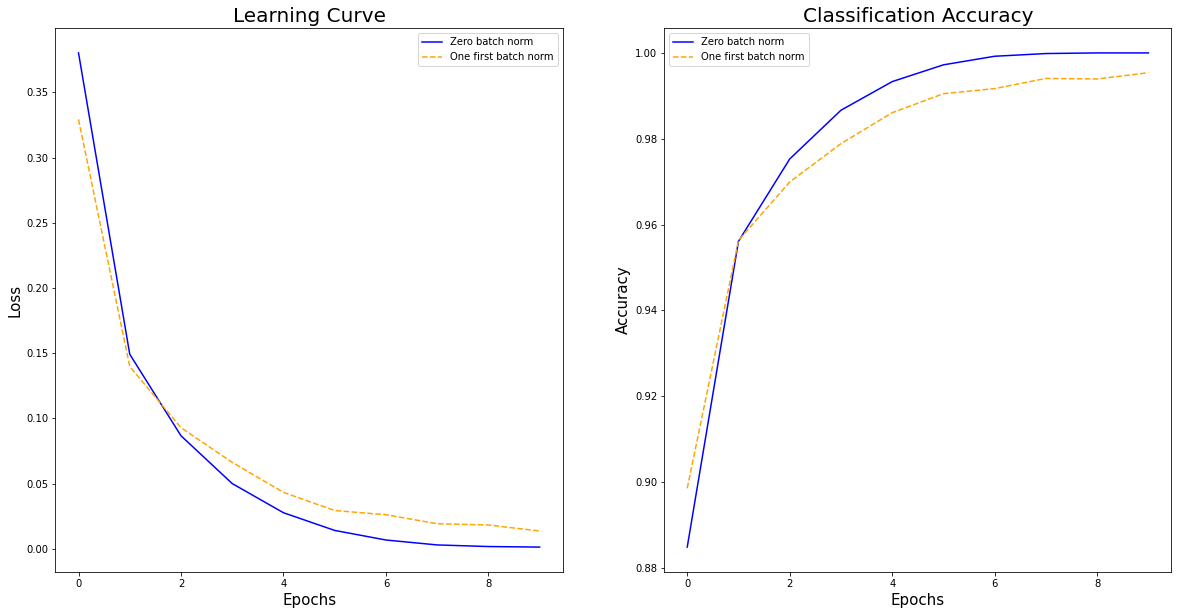

In [156]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(bn_histories[0].history['loss'], color='blue', label='Zero batch norm', ls="-")
plt.plot(bn_histories[1].history['loss'], color='orange', label='One first batch norm', ls="--")
# plt.plot(bn_histories[2].history['loss'], color='red', label='One second batch norm', ls="-.")
# plt.plot(bn_histories[3].history['loss'], color='black', label='Two batch norm', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(bn_histories[0].history['accuracy'], color='blue', label='Zero batch norm', ls="-")
plt.plot(bn_histories[1].history['accuracy'], color='orange', label='One first batch norm', ls="--")
# plt.plot(bn_histories[2].history['accuracy'], color='red', label='One seconde batch norm', ls="-.")
# plt.plot(bn_histories[3].history['accuracy'], color='black', label='Two batch norm', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [157]:
print(bn_histories[0].history['accuracy'])
print(bn_histories[1].history['accuracy'])

[0.8848889, 0.95611113, 0.9752963, 0.98664814, 0.9933148, 0.99722224, 0.9992222, 0.9998518, 1.0, 1.0]
[0.8985926, 0.9563148, 0.9699444, 0.9788704, 0.9860741, 0.9905, 0.9916852, 0.99405557, 0.9939259, 0.99538887]


### Mix

In [121]:
mix_histories = []

In [122]:
optimizer = SGD(learning_rate=0.1)
##
mc = ModelCheckpoint(f"sgd_best_weights_mix0_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix1_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix2_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix3_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories.append(history)

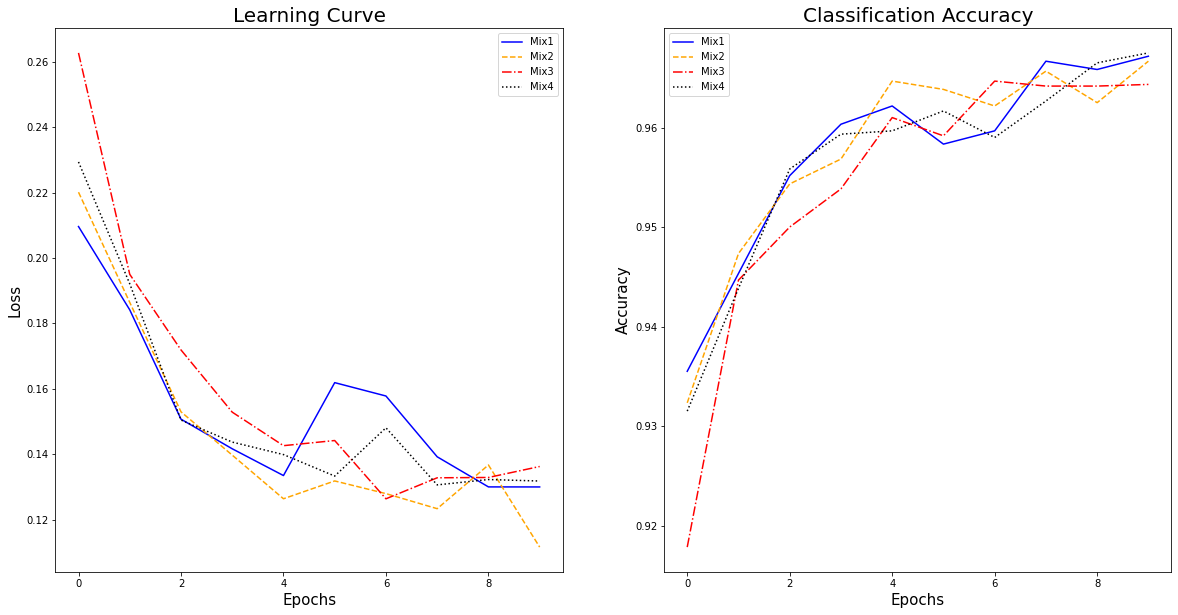

In [123]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['val_loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories[1].history['val_loss'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories[2].history['val_loss'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories[3].history['val_loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['val_accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories[1].history['val_accuracy'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories[2].history['val_accuracy'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories[3].history['val_accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [125]:
for i in range(4):
    model = load_model(f"sgd_best_weights_mix{i}_big.h5")
    print(model.evaluate(X_test, y_test, verbose=0))

[0.3166430302452296, 0.9231]
[0.31344823107384145, 0.925]
[0.33048271952718494, 0.908]
[0.34039052498191597, 0.9215]


In [126]:
mix_histories2 = []

In [127]:
optimizer = SGD(learning_rate=0.1)
##
mc = ModelCheckpoint(f"sgd_best_weights_mix4_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories2.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix5_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories2.append(history)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix6_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories2.append(history)

In [158]:
for i in range(3):
    model123 = load_model(f"sgd_best_weights_mix{i+4}_big.h5")
    print(model123.evaluate(X_test, y_test, verbose=0))

[0.32845059159100054, 0.9182]
[0.3155703260719776, 0.9241]
[0.30642304272800686, 0.9199]


In [159]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix7_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
#     Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history123 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# mix_histories.append(history)

In [160]:
history123.model.evaluate(X_test, y_test, verbose=0)

[0.33837514407485725, 0.9195]

In [181]:
model777 = load_model("sgd_best_weights_mix7_big.h5")
model777.evaluate(X_test, y_test, verbose=0)

[0.31284396055042746, 0.9243]

In [161]:
mix_histories3 = []

In [162]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix8_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history1234 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories3.append(history1234)

##
mc = ModelCheckpoint(f"sgd_best_weights_mix9_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history12345 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
mix_histories3.append(history12345)

In [163]:
print(history1234.model.evaluate(X_test, y_test, verbose=0))
print(history12345.model.evaluate(X_test, y_test, verbose=0))

[0.37050247074440124, 0.922]
[0.33875406930297614, 0.923]


In [182]:
model888 = load_model("sgd_best_weights_mix8_big.h5")
model888.evaluate(X_test, y_test, verbose=0)

[0.35394343725405636, 0.9191]

In [183]:
model999 = load_model("sgd_best_weights_mix9_big.h5")
model999.evaluate(X_test, y_test, verbose=0)

[0.33875406930297614, 0.923]

In [165]:
print(mix_histories3[0].history['val_accuracy'])
print(mix_histories3[1].history['val_accuracy'])

[0.94133335, 0.9533333, 0.95783335, 0.9601667, 0.9595, 0.96433336, 0.9686667, 0.96566665, 0.9675, 0.96666664]
[0.93983334, 0.95266664, 0.9586667, 0.96216667, 0.9625, 0.9636667, 0.9675, 0.9688333, 0.9686667, 0.96933335]


In [166]:
print(mix_histories2[0].history['val_accuracy'])
print(mix_histories2[1].history['val_accuracy'])

[0.92483336, 0.9495, 0.9525, 0.9495, 0.96033335, 0.9608333, 0.95683336, 0.963, 0.9648333, 0.96566665, 0.9685, 0.964, 0.96716666, 0.96416664, 0.9676667]
[0.92766666, 0.94783336, 0.948, 0.95566666, 0.9611667, 0.9611667, 0.96416664, 0.96416664, 0.96566665, 0.9651667, 0.9673333, 0.96416664, 0.966, 0.9686667, 0.96666664]


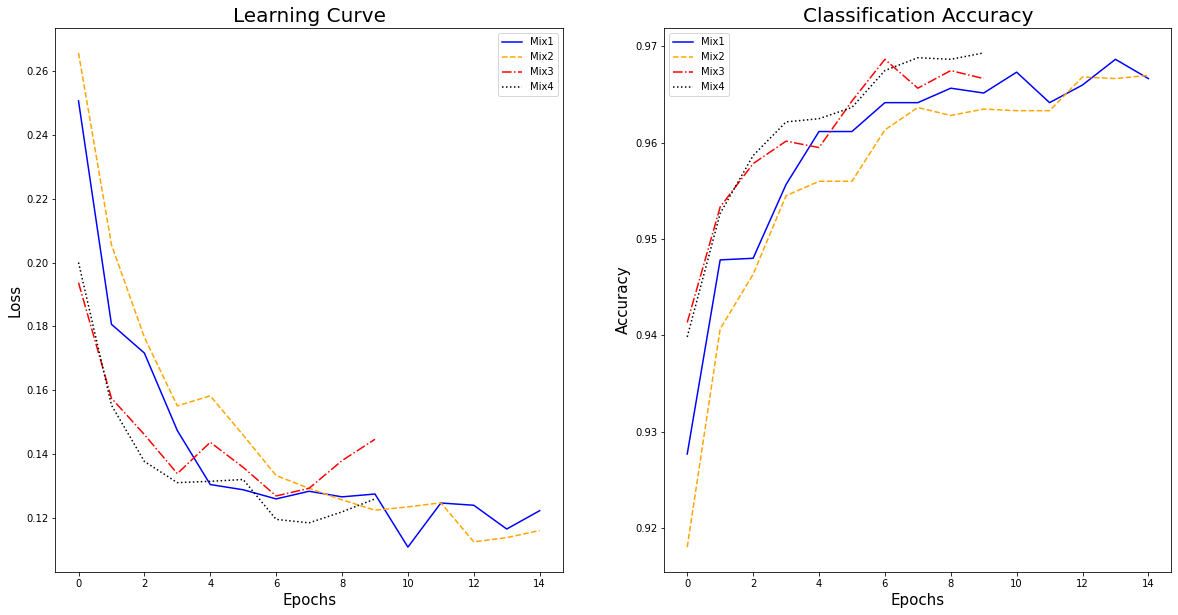

In [167]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories2[1].history['val_loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories2[2].history['val_loss'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['val_loss'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['val_loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories2[1].history['val_accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories2[2].history['val_accuracy'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['val_accuracy'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['val_accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

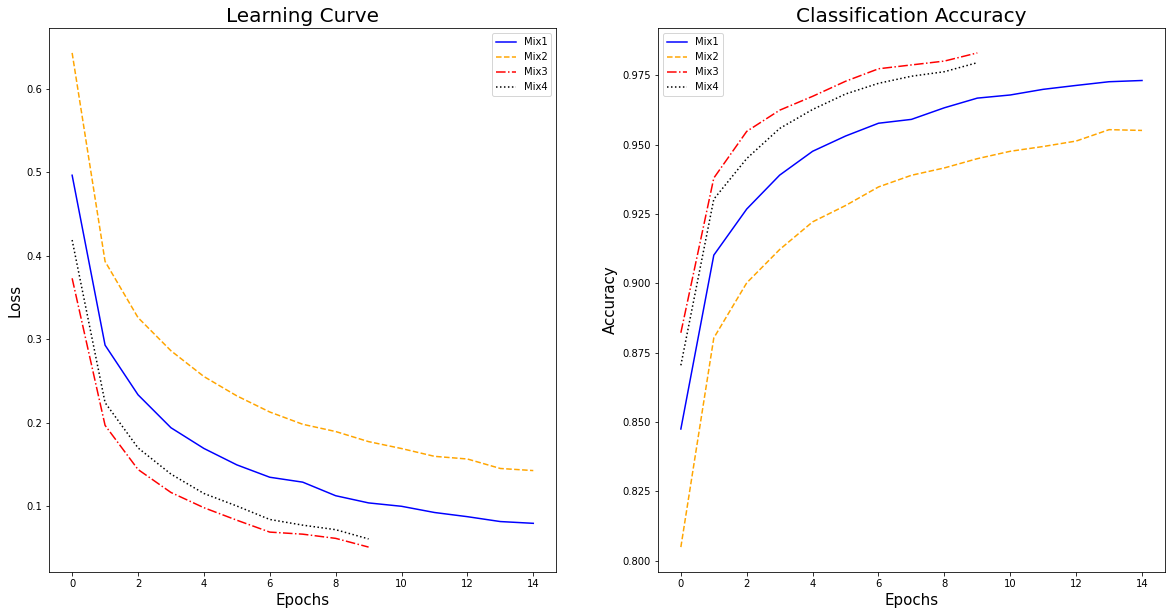

In [168]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories2[1].history['loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories2[2].history['loss'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['loss'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories2[1].history['accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories2[2].history['accuracy'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['accuracy'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

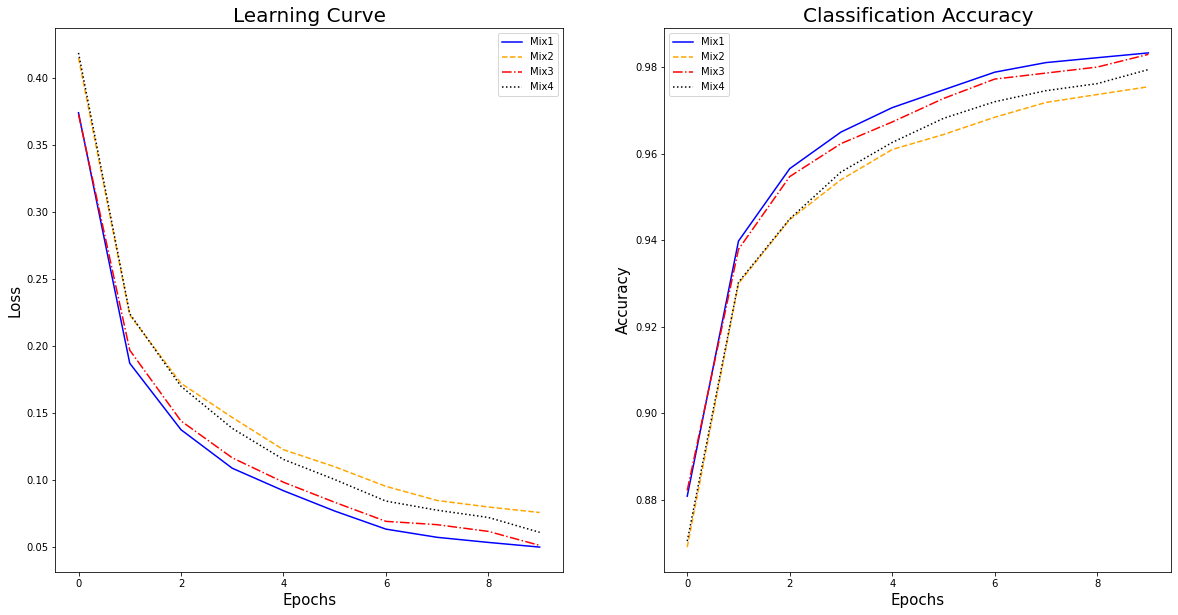

In [187]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories[1].history['loss'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['loss'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories[1].history['accuracy'], color='orange', label='Mix2', ls="--")
plt.plot(mix_histories3[0].history['accuracy'], color='red', label='Mix3', ls="-.")
plt.plot(mix_histories3[1].history['accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

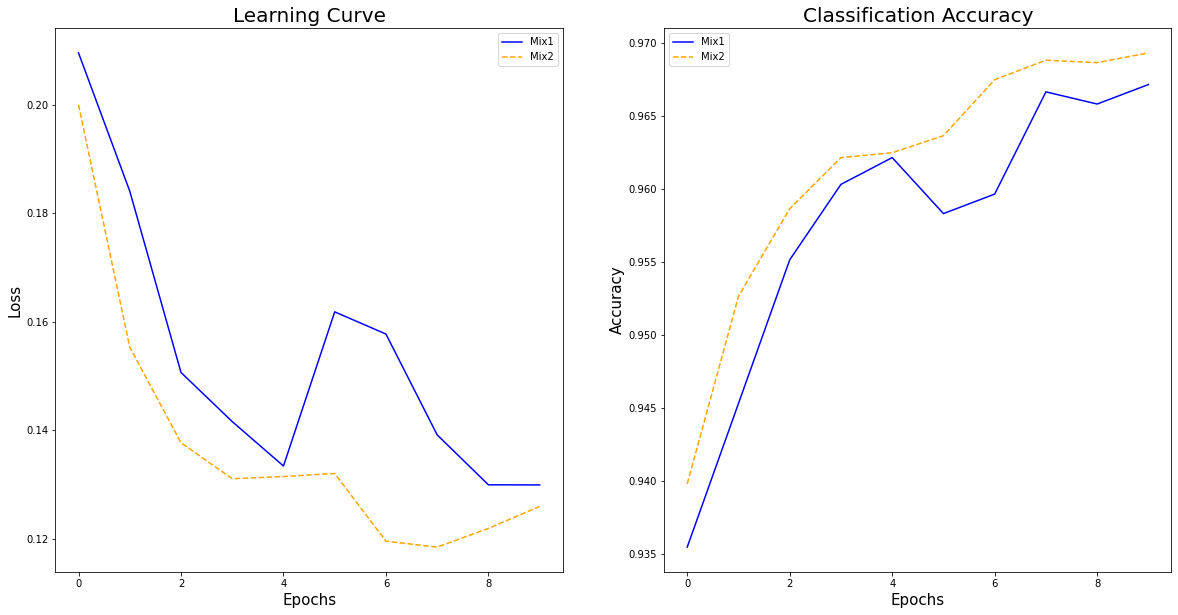

In [201]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['val_loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['val_loss'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_loss'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['val_accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['val_accuracy'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_accuracy'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

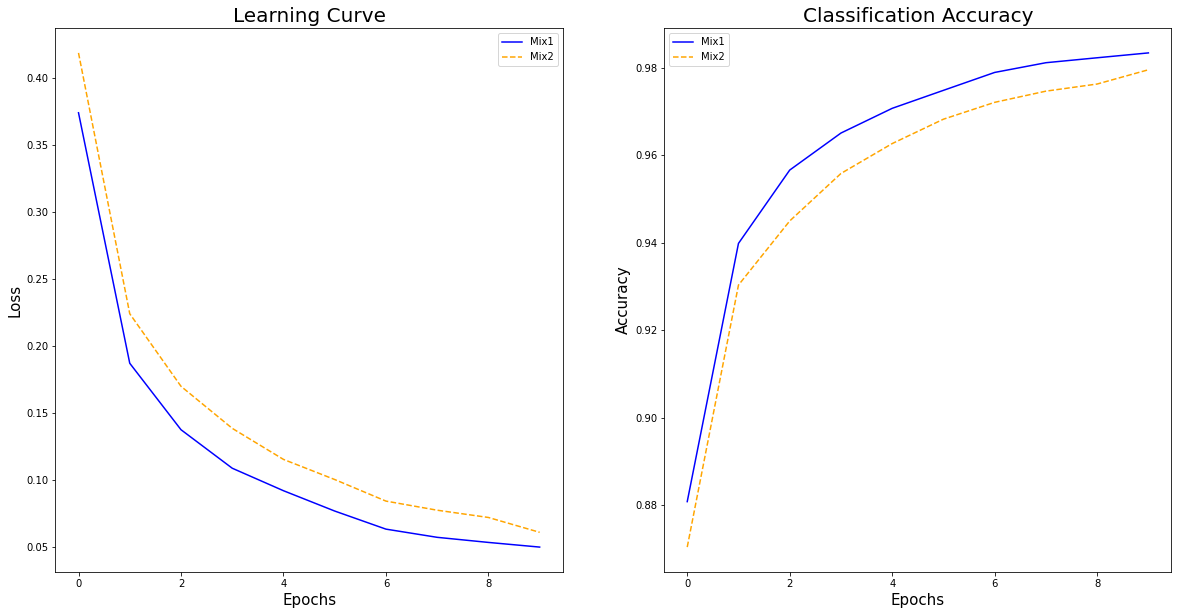

In [200]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['loss'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['loss'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['accuracy'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['accuracy'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

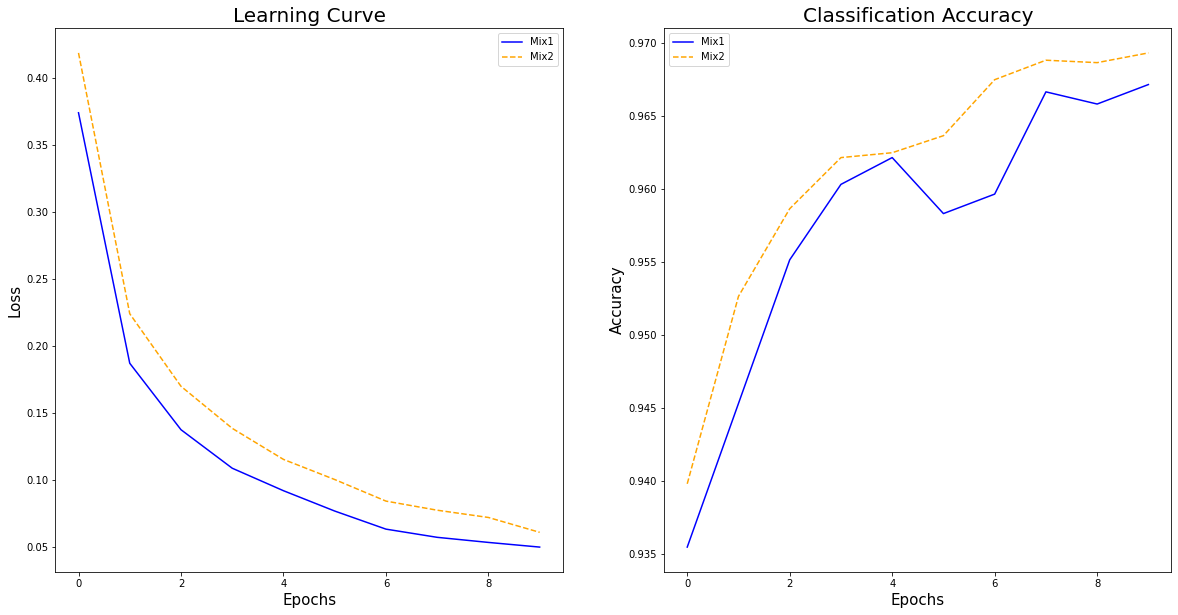

In [203]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['loss'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_loss'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(mix_histories[0].history['val_accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['val_accuracy'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_accuracy'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

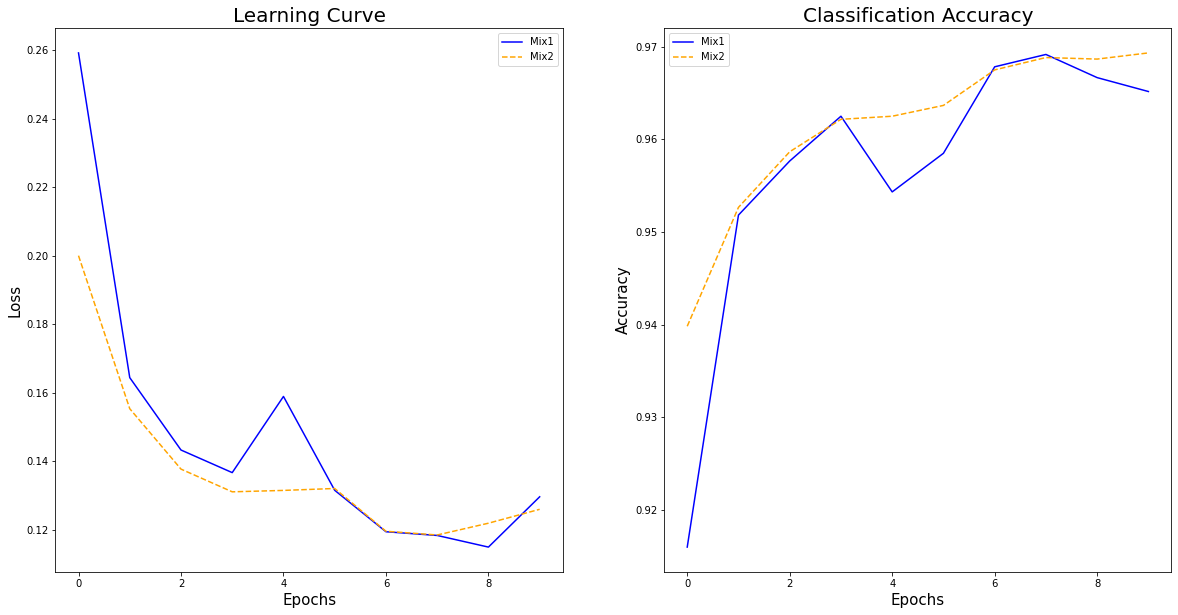

In [194]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(history123.history['val_loss'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['val_loss'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_loss'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_loss'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_loss'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(history123.history['val_accuracy'], color='blue', label='Mix1', ls="-")
plt.plot(mix_histories3[1].history['val_accuracy'], color='orange', label='Mix2', ls="--")
# plt.plot(mix_histories3[0].history['val_accuracy'], color='red', label='Mix3', ls="-.")
# plt.plot(mix_histories3[1].history['val_accuracy'], color='black', label='Mix4', ls=":")
# plt.plot(do_histories[4].history['val_accuracy'], color='green', label='Four dropouts', ls=":")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()

In [202]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix10_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history123456 = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# mix_histories3.append(history123456)

In [204]:
history123456.model.evaluate(X_test, y_test, verbose=0)

[0.3543054446149617, 0.928]

In [205]:
model101010 = load_model("sgd_best_weights_mix10_big.h5")
model101010.evaluate(X_test, y_test, verbose=0)

[0.3367787672366481, 0.9294]

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [180]:
converted_y_train = np.argmax(y_train, axis=1)
converted_y_test = np.argmax(y_test, axis=1)

In [179]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [177]:
converted_y_train.shape

(54000,)

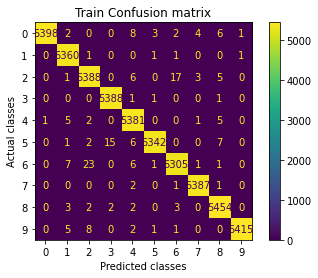

In [291]:
train_predict = mix_histories3[1].model.predict_classes(X_train)

cm = confusion_matrix(converted_y_train, train_predict)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Train Confusion matrix', 
                xlabel='Predicted classes', 
                ylabel='Actual classes')

plt.show()

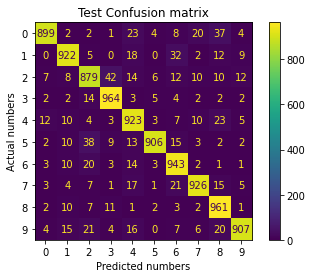

In [185]:
test_predict = model999.predict_classes(X_test)

cm = confusion_matrix(converted_y_test, test_predict)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Test Confusion matrix', 
                xlabel='Predicted numbers', 
                ylabel='Actual numbers')

plt.show()

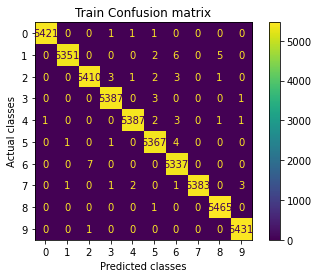

In [292]:
train_predict = history123456.model.predict_classes(X_train)

cm = confusion_matrix(converted_y_train, train_predict)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Train Confusion matrix', 
                xlabel='Predicted classes', 
                ylabel='Actual classes')

plt.show()

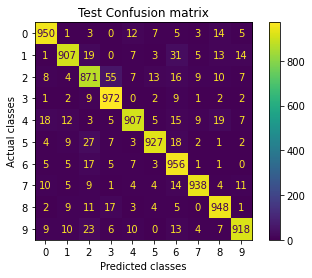

In [293]:
test_predict = model101010.predict_classes(X_test)

cm = confusion_matrix(converted_y_test, test_predict)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Test Confusion matrix', 
                xlabel='Predicted classes', 
                ylabel='Actual classes')

plt.show()

In [234]:
letters = np.load("data/kmnist-test-imgs.npz")["arr_0"]
letters_labels = np.load("data/kmnist-test-labels.npz")["arr_0"]

In [231]:
letters_labels[14]

1

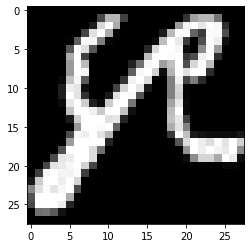

In [232]:
plt.imshow(letters[14], cmap="gray")

In [237]:
sellect = letters_labels == 7

In [239]:
seven = letters_labels[sellect]

In [247]:
letters_labels[20]

7

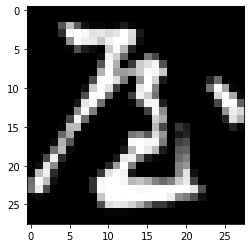

In [248]:
plt.imshow(letters[20], cmap="gray")

In [250]:
letters_labels[22]

7

In [270]:
index_letters1 = []
index_letters6 = []

In [271]:
for i in range(len(letters_labels)):
    if letters_labels[i] == 1:
        index_letters1.append(i)
    elif letters_labels[i] == 6:
        index_letters6.append(i)

In [272]:
index_letters1

[14,
 43,
 44,
 50,
 51,
 55,
 69,
 81,
 82,
 87,
 89,
 92,
 107,
 133,
 151,
 171,
 189,
 200,
 230,
 268,
 281,
 308,
 335,
 342,
 344,
 347,
 350,
 355,
 370,
 391,
 407,
 410,
 417,
 438,
 453,
 459,
 465,
 467,
 469,
 483,
 485,
 491,
 496,
 501,
 517,
 553,
 562,
 570,
 573,
 578,
 580,
 592,
 611,
 626,
 634,
 637,
 645,
 656,
 661,
 663,
 698,
 703,
 705,
 709,
 710,
 716,
 732,
 737,
 738,
 741,
 743,
 764,
 775,
 776,
 798,
 808,
 823,
 831,
 838,
 852,
 853,
 860,
 865,
 866,
 875,
 889,
 890,
 900,
 911,
 912,
 929,
 935,
 951,
 962,
 974,
 987,
 992,
 993,
 999,
 1002,
 1013,
 1023,
 1047,
 1051,
 1057,
 1075,
 1076,
 1082,
 1086,
 1087,
 1093,
 1096,
 1103,
 1104,
 1113,
 1117,
 1135,
 1154,
 1160,
 1171,
 1185,
 1198,
 1199,
 1200,
 1211,
 1213,
 1219,
 1226,
 1232,
 1233,
 1237,
 1238,
 1248,
 1261,
 1264,
 1276,
 1292,
 1295,
 1314,
 1326,
 1329,
 1331,
 1332,
 1336,
 1343,
 1353,
 1358,
 1361,
 1362,
 1377,
 1392,
 1403,
 1409,
 1415,
 1419,
 1428,
 1436,
 1437,
 1438

In [273]:
index_letters7

[20,
 22,
 24,
 41,
 73,
 77,
 91,
 94,
 127,
 148,
 158,
 163,
 179,
 185,
 193,
 212,
 214,
 219,
 222,
 227,
 248,
 261,
 265,
 275,
 284,
 285,
 291,
 293,
 303,
 311,
 313,
 325,
 339,
 354,
 358,
 371,
 380,
 394,
 395,
 396,
 397,
 427,
 442,
 451,
 452,
 470,
 518,
 527,
 538,
 541,
 547,
 554,
 563,
 572,
 577,
 584,
 588,
 595,
 600,
 627,
 639,
 642,
 654,
 659,
 682,
 683,
 686,
 696,
 708,
 713,
 740,
 747,
 755,
 767,
 770,
 787,
 795,
 797,
 801,
 825,
 837,
 846,
 847,
 858,
 883,
 884,
 904,
 910,
 922,
 944,
 946,
 961,
 963,
 976,
 983,
 988,
 990,
 995,
 1007,
 1008,
 1010,
 1016,
 1017,
 1049,
 1061,
 1081,
 1089,
 1094,
 1118,
 1119,
 1131,
 1132,
 1138,
 1140,
 1146,
 1151,
 1156,
 1161,
 1166,
 1169,
 1174,
 1193,
 1203,
 1216,
 1246,
 1252,
 1256,
 1259,
 1275,
 1283,
 1289,
 1297,
 1308,
 1317,
 1338,
 1352,
 1371,
 1390,
 1396,
 1404,
 1405,
 1408,
 1417,
 1423,
 1431,
 1442,
 1451,
 1456,
 1483,
 1485,
 1499,
 1501,
 1503,
 1513,
 1530,
 1549,
 1556,
 1576,


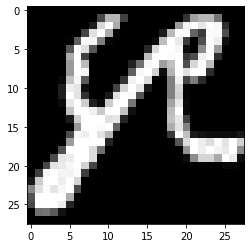

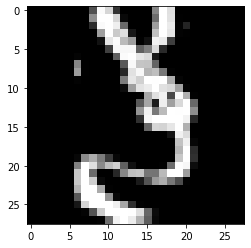

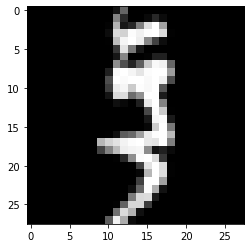

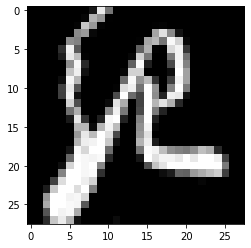

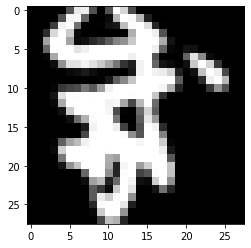

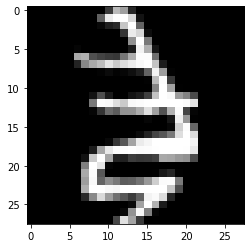

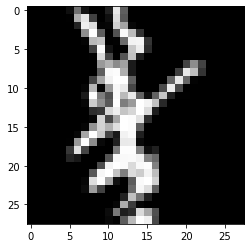

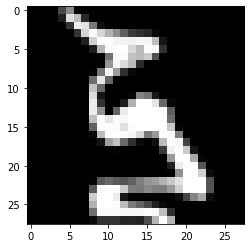

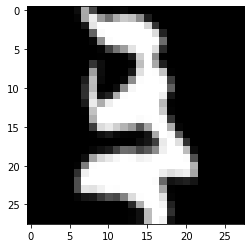

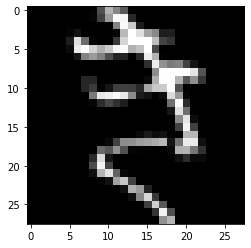

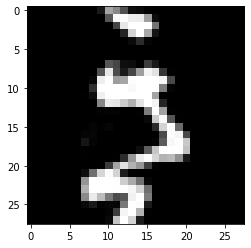

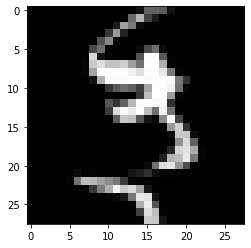

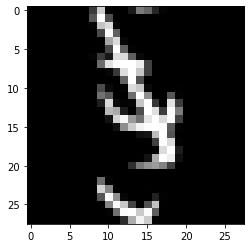

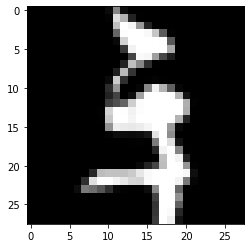

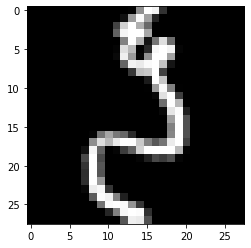

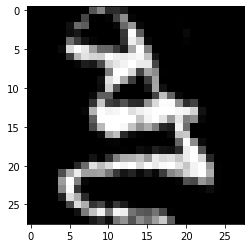

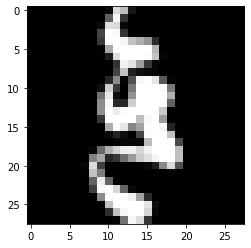

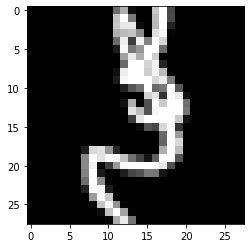

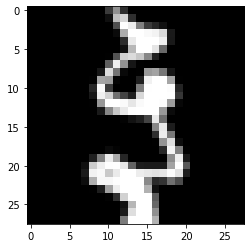

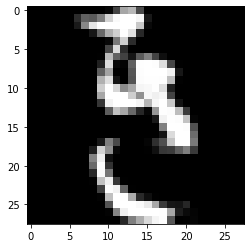

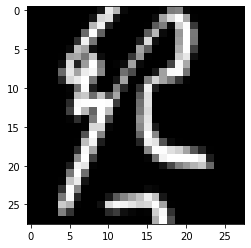

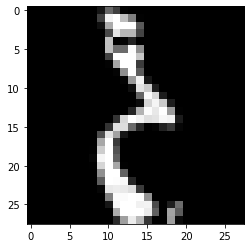

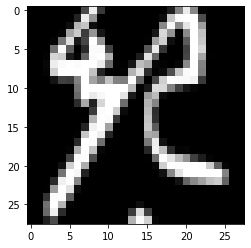

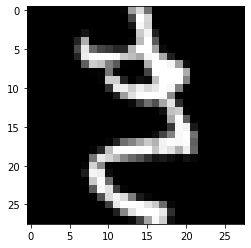

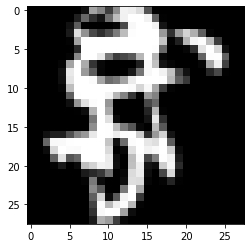

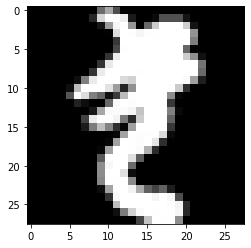

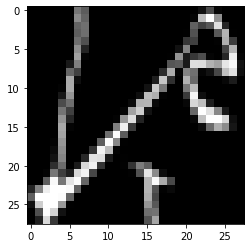

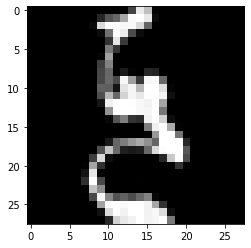

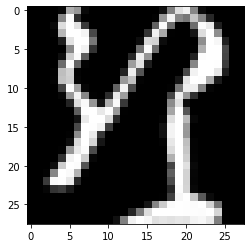

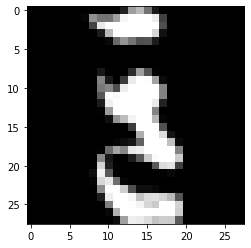

In [279]:
count = 0
for i in index_letters1:
    plt.imshow(letters[i], cmap="gray")
    plt.show()
    count += 1
    if count == 30:
        break

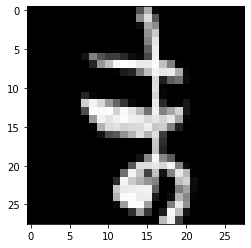

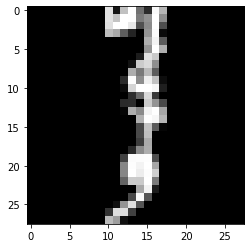

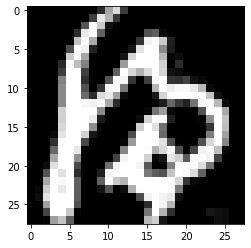

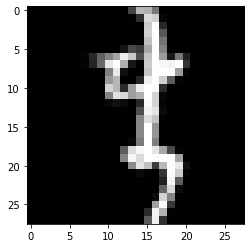

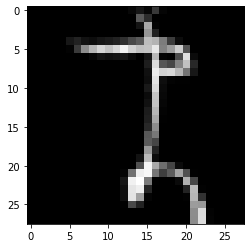

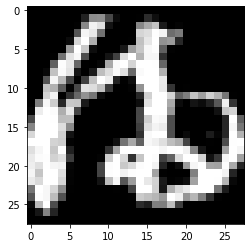

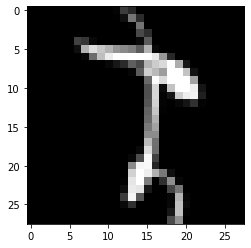

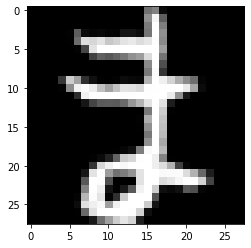

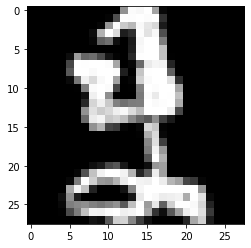

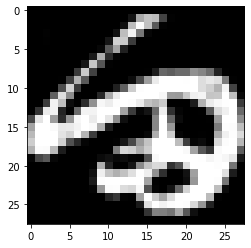

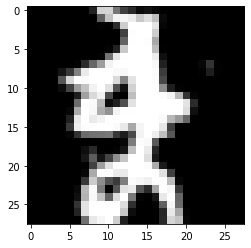

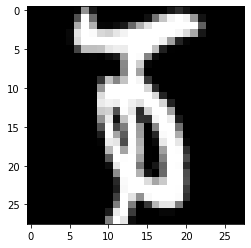

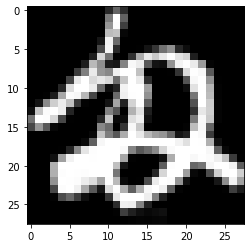

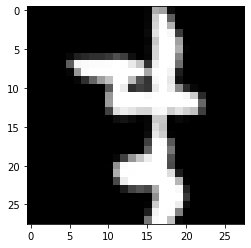

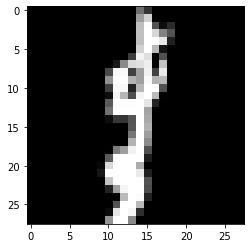

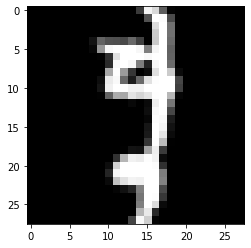

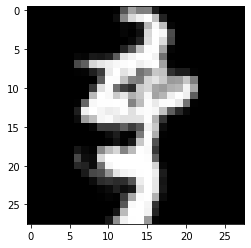

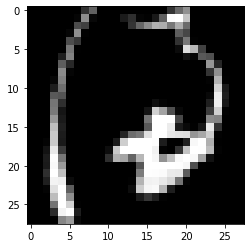

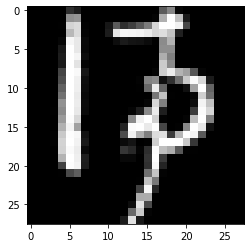

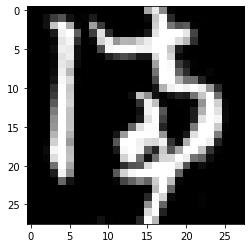

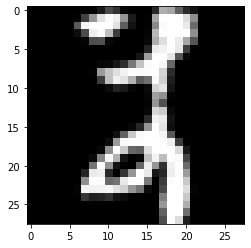

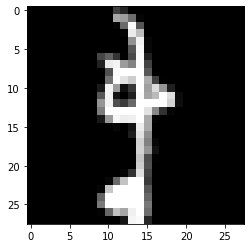

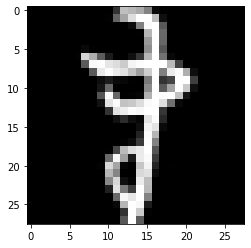

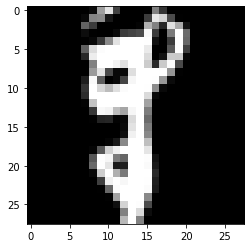

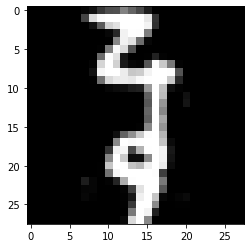

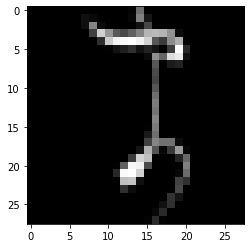

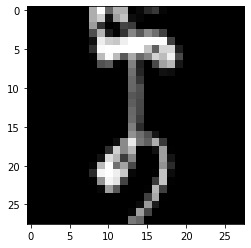

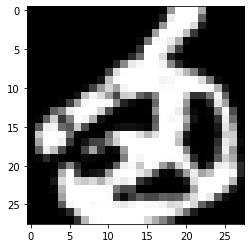

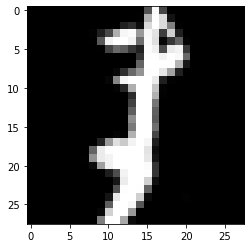

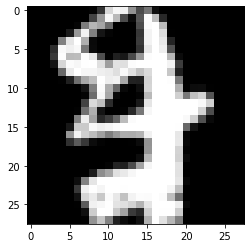

In [280]:
count = 0
for i in index_letters6:
    plt.imshow(letters[i], cmap="gray")
    plt.show()
    count += 1
    if count == 30:
        break

In [254]:
index_letters

[14,
 20,
 22,
 24,
 41,
 43,
 44,
 50,
 51,
 55,
 69,
 73,
 77,
 81,
 82,
 87,
 89,
 91,
 92,
 94,
 107,
 127,
 133,
 148,
 151,
 158,
 163,
 171,
 179,
 185,
 189,
 193,
 200,
 212,
 214,
 219,
 222,
 227,
 230,
 248,
 261,
 265,
 268,
 275,
 281,
 284,
 285,
 291,
 293,
 303,
 308,
 311,
 313,
 325,
 335,
 339,
 342,
 344,
 347,
 350,
 354,
 355,
 358,
 370,
 371,
 380,
 391,
 394,
 395,
 396,
 397,
 407,
 410,
 417,
 427,
 438,
 442,
 451,
 452,
 453,
 459,
 465,
 467,
 469,
 470,
 483,
 485,
 491,
 496,
 501,
 517,
 518,
 527,
 538,
 541,
 547,
 553,
 554,
 562,
 563,
 570,
 572,
 573,
 577,
 578,
 580,
 584,
 588,
 592,
 595,
 600,
 611,
 626,
 627,
 634,
 637,
 639,
 642,
 645,
 654,
 656,
 659,
 661,
 663,
 682,
 683,
 686,
 696,
 698,
 703,
 705,
 708,
 709,
 710,
 713,
 716,
 732,
 737,
 738,
 740,
 741,
 743,
 747,
 755,
 764,
 767,
 770,
 775,
 776,
 787,
 795,
 797,
 798,
 801,
 808,
 823,
 825,
 831,
 837,
 838,
 846,
 847,
 852,
 853,
 858,
 860,
 865,
 866,
 875,
 883,


In [208]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix11_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["accuracy"])

history1234567 = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# mix_histories3.append(history123456)

In [212]:
history1234567.history["accuracy"]

[0.69585186,
 0.7865,
 0.8297222,
 0.8415185,
 0.8534815,
 0.86444443,
 0.8704444,
 0.88305557,
 0.89633334,
 0.89555556,
 0.90037036,
 0.9103889,
 0.91514814,
 0.9131296,
 0.9120741]

In [210]:
history1234567.model.evaluate(X_test, y_test, verbose=0)

[3756705.1489427933, 0.8908]

In [211]:
model111111 = load_model("sgd_best_weights_mix11_big.h5")
model111111.evaluate(X_test, y_test, verbose=0)

[3756705.1489427933, 0.8908]

In [281]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix12_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["accuracy"])

history12345678 = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# mix_histories3.append(history123456)

In [282]:
history12345678.model.evaluate(X_test, y_test, verbose=0)

[12312385.037706345, 0.8892]

In [283]:
history12345678.history["val_accuracy"]

[0.8541667,
 0.8071667,
 0.85933334,
 0.8935,
 0.91583335,
 0.9141667,
 0.9138333,
 0.9295,
 0.92216665,
 0.9406667,
 0.926,
 0.9245,
 0.9201667,
 0.94533336,
 0.9305,
 0.9353333,
 0.95283335,
 0.9505,
 0.9465,
 0.92966664,
 0.9595,
 0.9471667,
 0.93233335,
 0.9505,
 0.95266664,
 0.9518333,
 0.945,
 0.917,
 0.9475,
 0.935]

In [284]:
model121212 = load_model("sgd_best_weights_mix12_big.h5")
model121212.evaluate(X_test, y_test, verbose=0)

[1614383.0747157787, 0.9053]

In [285]:
##
mc = ModelCheckpoint(f"sgd_best_weights_mix13_big.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=0)

model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dropout(0.25),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

history123456789 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True, verbose=0)
# mix_histories3.append(history123456)

In [286]:
history123456789.model.evaluate(X_test, y_test, verbose=0)

[0.4474554651465267, 0.9115]

In [289]:
history123456789.history["val_accuracy"]

[0.9058333,
 0.93383336,
 0.94016665,
 0.9403333,
 0.9511667,
 0.954,
 0.9546667,
 0.9561667,
 0.95966667,
 0.95916665]

In [290]:
model131313 = load_model("sgd_best_weights_mix13_big.h5")
model131313.evaluate(X_test, y_test, verbose=0)

[0.3896679644063115, 0.9051]

In [ ]:
model5 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(200, activation="relu"),
    Dropout(0.25),
    Dense(100, activation="relu"),
    Dropout(0.25),
    Dense(50, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model5.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

mc = ModelCheckpoint("best_weights5.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
histories5 = model5.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

In [ ]:
model5 = load_model("best_weights5.h5")
model5.evaluate(X_test, y_test, verbose=0)

In [ ]:
model6 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(2000, activation="relu"),
    Dropout(0.25),
    Dense(1000, activation="relu"),
#     Dropout(0.25),
#     Dense(50, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model6.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

mc = ModelCheckpoint("best_weights6.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
histories6 = model6.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

In [ ]:
model6 = load_model("best_weights6.h5")
model6.evaluate(X_test, y_test, verbose=0)

In [ ]:
model7 = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(200, activation="relu"),
    Dropout(0.25),
    Dense(100, activation="relu"),
    Dropout(0.25),
    Dense(50, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model7.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

mc = ModelCheckpoint("best_weights7.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)
histories7 = model7.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid), callbacks=[mc], shuffle=True)

In [ ]:
model7 = load_model("best_weights7.h5")
model7.evaluate(X_test, y_test, verbose=0)

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Learning Curve', fontdict={"fontsize":20})
plt.plot(model1.history.history['val_loss'], color='blue', label='CNN')
plt.plot(model2.history.history['val_loss'], color='orange', label='CNN+BN')
# plt.plot(model3.history.history["val_loss"], color="red", label="basic+AG")
plt.plot(model4.history.history["val_loss"], color="red", label="CNN+CL")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Loss", fontdict={"fontsize":15})
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy', fontdict={"fontsize":20})
plt.plot(model1.history.history['val_accuracy'], color='blue', label='CNN')
plt.plot(model2.history.history['val_accuracy'], color='orange', label='CNN+BN')
# plt.plot(model3.history.history["val_accuracy"], color="red", label="basic+AG")
plt.plot(model4.history.history["val_accuracy"], color="red", label="CNN+CL")
plt.xlabel("Epochs", fontdict={"fontsize":15})
plt.ylabel("Accuracy", fontdict={"fontsize":15})
plt.legend()
plt.show()